# **REAL ESTATE ANALYSIS**: BUY/RENT HOUSES IN MILAN
## How to select the best opportunities according to OMI price quotations and surrounding VENUES for buying houses in Milan.
### Capstone Project - The Battle of Neighborhoods
Author: Pier Luigi Segatto, 02/02/2021 <br />
contact: pier.segatto@gmail.com

<img src="https://upload.wikimedia.org/wikipedia/commons/3/30/Wide_angle_Milan_skyline_from_Duomo_roof.jpg">

## Table of Contents

* [1. Introduction](#1.)
    * [1.1. Business Problem](#1.1.)
    * [1.2. Target Audience](#1.2.)
* [2. Data](#2.)
    * [2.1 Visualization](#2.1.)
* [3. Methodology and Results](#3.)
    * [3.1. Requirements](#3.1.)
    * [3.2. Milan boroughs dataset](#3.2.)
    * [3.3. Milan neighborhoods visualization](#3.3.)
    * [3.4. OMI quotations housing price dataset](#3.4.)
    * [3.5. Neighborhood venues](#3.5.)
    * [3.6. Data visualization: quotation prices for each neighborhood](#3.6.)
    * [3.7. Price prediction based on distance: Regression](#3.7.)  
    * [3.8. Venues analysis: Neighborhood segmentation and clustering](#3.8.) 
* [4. Discussion](#4.)   
* [5. Conclusions](#5.)   


## 1. Introduction <a name="1."></a>

Milan is the second-most populous city in Italy after Rome. 
The city proper has a population of about 1.4 million while its metropolitan city has 3.26 million inhabitants ([ISTAT](http://demo.istat.it/bilmens2019gen/index.html)). Its continuously built-up urban area, that stretches well beyond the boundaries of the administrative metropolitan city, is the fourth largest in the EU with 5.27 million inhabitants. The population within the wider Milan metropolitan area, also known as Greater Milan, is estimated at 8.2 million, making it by far the largest metropolitan area in Italy and the 3rd largest in the EU ([source](http://www.old.unimib.it/open/news/Le-aree-metropolitane-in-Italia-occupano-il-9-per-cento-del-territorio/193547881368277998)). <br />
Milan is considered a leading global city, with strengths in the field of the art, commerce, design, education, entertainment, fashion, finance, healthcare, media, services, research and tourism. The city has been recognized as one of the world's four fashion capitals thanks to several international events and fairs, including Milan Fashion Week and the Milan Furniture Fair, which are currently among the world's biggest in terms of revenue, visitors and growth. It hosts numerous cultural institutions, academies and universities. <br />
Whereas Rome is Italy's political capital, Milan is the country's industrial and financial heart. In 2019 GDP per-capita of Milan is estimated at €49.000, steadily increasing, and significantly higher that the Italian average of €26.000 ([source](https://www.assolombarda.it/media/comunicati-stampa/rassegna-stampa-osservatorio-milano-2019-7-novembre-2019)). <br />
Milan is the destination of 11 million visitors in 2019 (as reported in the city website ([source](https://www.comune.milano.it/-/turismo.-nel-2019-sfiorati-11-milioni-di-visitatori)), attracted by its museums and art galleries, that include some of the most important collections in the world, like the major works by Leonardo da Vinci. The city is served by many luxury hotels and dreamy restaurants. <br />
Last but not least, Milan will host the 2026 Winter Olympics together with Cortina d'Ampezzo. <br />

## 1.1. Business Problem <a name="1.1."></a> 

Milan represents the epicenter for Italian life and it attracts companies, corporates, and people who move their core businesses and lives there. Due to the huge variety and heterogeneity of services and possibilities, prices for housing in Milan can be high and different among different areas of the city.

The goal of this project is to develop a tool for finding the most efficient *venue*- and *price*-wise solution for buying an house in Milan. This project will focus on finding the characteristics of each neighborhood in terms of house prices and relevant venues in the surrounding area (like restaurants, gyms, parks...). By adopting Machine learning solutions such as clustering and regression, this project will answer to the following questions: 

<font color = "black" size = "+1">1. If you want to buy or rent an house in Milan, which is the best neighborhood according to your capital, your lifestyle, and needs?</font>

<font color = "black" size = "+1">2. If you want to eat sushi and visit a museum, which neighborhood should you visit? </font>

<font color = "black" size = "+1">3. You are looking for an apartment, close to transportation station and to an italian restaurant, which neighborhood should you consider? </font>

<img src="https://traveldir.co/wp-content/uploads/2020/12/milan-info-map-of-italy-with-yellow-pin-marking-milano-centro-storico.jpg">

## 1.2. Target Audience <a name='1.2.'></a>

Real estates. 

Housing investors.

Privates looking for the perfect place to rent or buy a house in Milan. 

Tourists.

## 2. Data <a name='2.'><a/>

The data for this project has been retrieved from multiple sources, paying the utmost attention to the reliability of them. For this reason, the data was collected from:
1. [Milan borough dataset](#Borough) and [house market and rental values dataset](#Values): retrieved from the Italian Revenue Agency website ([source](https://www.agenziaentrate.gov.it/portale/schede/fabbricatiterreni/omi/banche-dati/quotazioni-immobiliari)), where the Milan borough list and the information about the market values and the rental values of the houses have been found, related to the 1st half of 2020, depending on the house location and the state of the property, and considering the negative influence brought by the COVID19 pandemic on real estate markets. <br /> In order to access to the CSV file, it's necessary to register to the website.
2. [Geo-locational information of Milan city center and the neighborhoods](#Location): using  Google Maps Geocoding API, it is possible to retrieve the geo-locational information (latitude and longitude) of Milan city center and the neighborhoods.
3. [Surrounding venues for each neighborhood](#Venues): obtained using FourSquare API platform.

These datasets allow to explore and implement ML algorithms to gain insights on Milan and inform the final user on best locations. The [Milan borough dataset](#Borough) allowed to determine the value of the house, on the basis of the borough position and the state of the property. Neighborhoods locations have been fundamental to understand the correlation between the neighborhood positions (in terms of distance from the Milan city center) and the value of the houses. These positions, together with venues data, have been essential to determinate the clusters and identify the most common venues for each of them.

## 3. Methodology <a name='3.'><a/>

In the following sections:
- Libraries and external packages are loaded, Milan datasets are imported, cleaned and explored.
- Neighborhoods’ location are visualized and venues are downloaded and formatted to meet the required standards.

## 3.1. Requirements <a name='3.1.'><a/>

The first and important step in data science is the data retrieval; indeed, there aren’t reliable and precise analysis without using the best data and the most appropriate technique and algorithms. <br/>
This analysis starts with the data collection and cleaning, in order to get all the essential data to achieve the goal of this study.

### Download Libraries

uncomment the next cell if folium or geopy are not available

In [1]:
# !conda install -c conda-forge folium=0.5.0 --yes 
# !conda install -c conda-forge geopy --yes 

Import the required libraries. 

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Optimization and machine learning libraries
from scipy.optimize import curve_fit # fitting routines
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing # to normalize columns of dataframes

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

# Seaborn library for visualization
import seaborn as sns

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 3.2. Milan boroughs dataset <a name='3.2.'><a/>

Use the requests library to download the Milan dataset.

In [3]:
url = "https://raw.githubusercontent.com/pierluigisegatto/Data_Science_Material/main/IBM%20Data%20Science%20Professional%20Certificate/8-ML_Full_Project/Real%20estate%20Milan%20/Milan%20Neighborhood.csv"
page = requests.get(url)
if page.status_code == 200:
    print('Page download successful')
else:
    print('Page download error. Error code: {}'.format(page.status_code))

Page download successful


In [4]:
# be careful to use ';' as a separator
neighborhoods=pd.read_csv(url, sep=';')
neighborhoods.head(5)

,Area_territoriale,Regione,Prov,Comune_ISTAT,Comune_cat,Sez,Comune_amm,Comune_descrizione,Fascia,Zona_Descr,Zona,LinkZona,Cod_tip_prev,Descr_tip_prev,Stato_prev,Microzona
0,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,"'CENTRO STORICO -DUOMO, SANBABILA, MONTENAPOLE...",B12,MI00003228,20,Abitazioni civili,N,2
1,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,'CENTRO STORICO -UNIVERSITA STATALE',B13,MI00003232,20,Abitazioni civili,N,3
2,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,'CENTRO STORICO - BRERA',B15,MI00003544,20,Abitazioni civili,O,0
3,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,"'CENTRO STORICO -SANT`AMBROGIO, CADORNA, VIA D...",B16,MI00003545,20,Abitazioni civili,O,0
4,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,NaN,F205,MILANO,B,"'PARCO SEMPIONE, ARCO DELLA PACE'",B17,MI00004767,20,Abitazioni civili,N,0


In [5]:
# understand a bit the dataset
print(f'Minal has {neighborhoods.shape[0]} Boroughs')

Minal has 38 Boroughs


In [6]:
# check for unique values 
print(neighborhoods['Descr_tip_prev'].unique())
print(neighborhoods['Stato_prev'].unique())
print(neighborhoods['Microzona'].unique())

['Abitazioni civili' 'Non presente']
['N' 'O' nan]
[ 2  3  0 22 32 34 35 37 40 42 43 47 50]


In [7]:
# where the anomaly occur? 
neighborhoods.loc[(neighborhoods['Descr_tip_prev']== 'Non presente') | (neighborhoods['Stato_prev']== np.nan),'Zona_Descr']

37    'RONCHETTO, CHIARAVALLE, RIPAMONTI'
Name: Zona_Descr, dtype: object


Filter only needed columns, i.e. keep only the neighborhood description name the zone code. Translate column names and clean the neighborhoods names from quotes.

Get the actual Neighborhood names by splitting each descriptive name (Boro) where comma occurs. This step is needed to retrieve the latitude and longitude of each neighborhoods.

In [8]:
# keep useful cols
milan = neighborhoods[['Zona_Descr','Zona','Fascia']].copy() 
# translate col names
milan.rename(columns={'Zona_Descr':'Neighborhoods',"Zona":'Code','Fascia':'Area'},inplace=True)
# Get rid of quotes in names
milan['Neighborhoods'].replace("'", '',regex=True,inplace=True)
# explode the dataset to get the actual neighborhood names
milan = milan.set_index(['Code','Area']).apply(lambda x: x.str.split(',').explode()).reset_index()
# porta romana occurs 2 times one with code B19 and one with code B20
milan[['Neighborhoods']] = milan[['Neighborhoods']].drop_duplicates(keep='first')

milan.head(5)



,Code,Area,Neighborhoods
0,B12,B,CENTRO STORICO -DUOMO
1,B12,B,SANBABILA
2,B12,B,MONTENAPOLEONE
3,B12,B,MISSORI
4,B12,B,CAIROLI


In [9]:
print(f'Milan has {milan.shape[0]} Neighborhoods')

Milan has 104 Neighborhoods


Some neighborhood names cannot be recognized by Google Maps Geocoding API. It's essential to edit them, to ensure the success of the last step (latitudes and longitudes retrive)

In [10]:
milan['Neighborhoods'].replace("SANBABILA", "SAN BABILA", regex=True, inplace=True)
milan['Neighborhoods'].replace("FAENZA", "VIALE FAENZA", regex=True, inplace=True)
milan['Neighborhoods'].replace("P.ROSSI", "VIA PELLEGRINO ROSSI", regex=True, inplace=True)
milan['Neighborhoods'].replace("CORSO VENEZIA", "PORTA VENEZIA", regex=True, inplace=True)
milan['Neighborhoods'].replace("SANTA GIULIA", "MILANO SANTA GIULIA", regex=True, inplace=True)
milan['Neighborhoods'].replace("UNIVERSITA STATALE", "CITTÀ STUDI", regex=True, inplace=True)
milan['Neighborhoods'].replace("STAZIONE CENTRALE VIALE STELVIO", "STAZIONE CENTRALE", regex=True, inplace=True)
milan['Neighborhoods'].replace("C.NA MERLATA", "CASCINA MERLATA", regex=True, inplace=True)
milan['Neighborhoods'].replace("MONZA", "VIALE MONZA", regex=True, inplace=True)
milan['Neighborhoods'].replace("BUENOS AIRES", "CORSO BUENOS AIRES", regex=True, inplace=True)
milan['Neighborhoods'].replace("TITO LIVIO", "VIA TITO LIVIO", regex=True, inplace=True)
milan['Neighborhoods'].replace("MAROCCHETTI", "VIA CARLO MAROCHETTI", regex=True, inplace=True)
milan['Neighborhoods'].replace("REGINA GIOVANNA", "VIALE REGINA GIOVANNA", regex=True, inplace=True)
milan['Neighborhoods'].replace("ASCANIO SFORZA", "VIA ASCANIO SFORZA", regex=True, inplace=True)
milan['Neighborhoods'].replace("Q. ROMANO", "QUINTO ROMANO", regex=True, inplace=True)

milan['Neighborhoods'] = milan['Neighborhoods'].str.replace('CENTRO STORICO -', '')



In [11]:
# Remove Venezia as there is a duplicate called PORTA VENEZIA and VENEZIA
milan = milan[milan['Neighborhoods'] != "VENEZIA"] 
milan.shape

(103, 3)

In [12]:
# remove all white spaces at beginning of each neigh name
milan['Neighborhoods'] = milan['Neighborhoods'].str.lstrip(' ')

In [13]:
neigh_df = milan[['Neighborhoods']]
print(f'Milan has {neigh_df.shape[0]} unique Neighborhood names')

Milan has 103 unique Neighborhood names


### Retrive the geo-locational information 

In [14]:
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderNotFound

address= (neigh_df['Neighborhoods'] + ', Milano, MI , Italia')
geolocater= Nominatim(user_agent="milan_coordinates-explorer")
location=[]
empty=[]

def getcoords(add):
    try:
        coords= geolocater.geocode(add, timeout=10)
        location.append([add, coords.latitude, coords.longitude])
        print("the coords are {}".format(location[-1]))
    
    except GeocoderTimedOut:
        return getcoords(add)
    
    except:
        empty.append([add])
        print("Couldn't find coords of {}".format(empty[-1]))
        
for add in address:
        getcoords(add)

the coords are ['DUOMO, Milano, MI , Italia', 45.4645848, 9.1896695]
the coords are ['SAN BABILA, Milano, MI , Italia', 45.4665214, 9.1975286]
the coords are ['MONTENAPOLEONE, Milano, MI , Italia', 45.470015, 9.1928678]
the coords are ['MISSORI, Milano, MI , Italia', 45.4598278, 9.1895549]
the coords are ['CAIROLI, Milano, MI , Italia', 45.4687012, 9.1816966]
the coords are ['CITTÀ STUDI, Milano, MI , Italia', 45.4770557, 9.2265746]
the coords are ['BRERA, Milano, MI , Italia', 45.47347885, 9.188407990372653]
the coords are ['SANT`AMBROGIO, Milano, MI , Italia', 45.4613906, 9.1729167]
the coords are ['CADORNA, Milano, MI , Italia', 45.4681551, 9.1771024]
the coords are ['VIA DANTE, Milano, MI , Italia', 45.4663326, 9.1847796]
the coords are ['PARCO SEMPIONE, Milano, MI , Italia', 45.47301905, 9.176969268773153]
the coords are ['ARCO DELLA PACE, Milano, MI , Italia', 45.47569195, 9.172427802834267]
the coords are ['TURATI, Milano, MI , Italia', 45.475039, 9.1947243]
the coords are ['MOS

### Save found neighborhood coordinates 

In [15]:
neighborhoods_coordinates = pd.DataFrame(location, columns=['Neighborhoods','Latitude','Longitude'])
neighborhoods_coordinates['Neighborhoods'].replace(", Milano, MI , Italia", "", regex=True, inplace=True)
neighborhoods_coordinates['Area'] = milan['Area']
neighborhoods_coordinates.to_csv('coordinates.csv')

neighborhoods_coordinates.head()

,Neighborhoods,Latitude,Longitude,Area
0,DUOMO,45.464585,9.189670,B
1,SAN BABILA,45.466521,9.197529,B
2,MONTENAPOLEONE,45.470015,9.192868,B
3,MISSORI,45.459828,9.189555,B
4,CAIROLI,45.468701,9.181697,B


## 3.3 Milan neighborhoods visualization <a name='3.3.'><a/>

To get a sense to the study, it is of primary importance to know the precise location of each neighborhoods. For this reason, it's essential to create a map of Milan, in which all the neighborhood positions are shown. To be more exhaustive, all the Milan areas (B, C, D and E) are differentiated by different colors. <br />
Therefore, the map of Milan neighborhoods has been plotted using the Folium library.

### Retrieve Milan coordinates

In [16]:
Milan_address='Milan, Italy'
geolocater= Nominatim(user_agent="Milan_search")
center= geolocater.geocode(Milan_address)
lat= center.latitude
lon= center.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(Milan_address,lat, lon))

The geograpical coordinate of Milan, Italy are 45.4668, 9.1905.


### Create the map

In [17]:
neighborhoods_coordinates['Area'] = milan['Code'].str[:1]
neighborhoods_coordinates['Code'] = milan['Code']
neighborhoods_coordinates.head()


,Neighborhoods,Latitude,Longitude,Area,Code
0,DUOMO,45.464585,9.189670,B,B12
1,SAN BABILA,45.466521,9.197529,B,B12
2,MONTENAPOLEONE,45.470015,9.192868,B,B12
3,MISSORI,45.459828,9.189555,B,B12
4,CAIROLI,45.468701,9.181697,B,B12


In [18]:
Milan_map=folium.Map(location=[lat,lon],zoom_start=11)

def color(letter): 
    if letter == 'B': 
        col = 'blue'
    elif letter == 'C': 
        col = 'green'
    elif letter == 'D': 
        col = 'purple'
    else: 
        col='red'
    return col 

for lat, long, nieghborhood, letter in zip(neighborhoods_coordinates['Latitude'], neighborhoods_coordinates['Longitude'], neighborhoods_coordinates['Neighborhoods'], neighborhoods_coordinates['Area']):
    label=folium.Popup(nieghborhood, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=2,
        popup=label,
        color= color(letter),
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False, legend_name='SCALE').add_to(Milan_map)
    
legend_html = '''
    <div style="position: fixed;  
        bottom: 10px; left: 10px; width: 100px; height: 120px; 
        border:2px solid grey; z-index:9999; font-size:11px;">&nbsp; Legend <br>
        &nbsp; <b> Area B </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
        &nbsp; <b> Area C </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
        &nbsp; <b> Area D </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i><br>
        &nbsp; <b> Area E </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
    </div>
    '''
Milan_map.get_root().html.add_child(folium.Element(legend_html))

Milan_map

## 3.4 OMI quotations housing price dataset <a name='3.4.'><a/>

In [19]:
url = "https://raw.githubusercontent.com/pierluigisegatto/Data_Science_Material/main/IBM%20Data%20Science%20Professional%20Certificate/8-ML_Full_Project/Real%20estate%20Milan%20/Market%20values%20of%20house%20in%20Milan.csv"
page = requests.get(url)
if page.status_code == 200:
    print('Page download successful')
else:
    print('Page download error. Error code: {}'.format(page.status_code))

Page download successful


In [20]:
values=pd.read_csv(url, sep=';')
values.head(10)

,Area_territoriale,Regione,Prov,Comune_ISTAT,Comune_cat,Sez,Comune_amm,Comune_descrizione,Fascia,Zona,LinkZona,Cod_Tip,Descr_Tipologia,Stato,Stato_prev,Compr_min,Compr_max,Sup_NL_compr,Loc_min,Loc_max,Sup_NL_loc
0,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,20,Abitazioni civili,OTTIMO,NaN,9000,12300,L,28,"37,5",L
1,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,20,Abitazioni civili,NORMALE,P,7400,9000,L,23,28,L
2,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,21,Abitazioni di tipo economico,NORMALE,P,6500,7800,L,18,22,L
3,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,21,Abitazioni di tipo economico,OTTIMO,NaN,7800,9000,L,24,30,L
4,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,19,Abitazioni signorili,OTTIMO,P,11200,14300,L,"37,5",46,L
5,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,13,Box,NORMALE,P,4700,6600,L,"14,5","21,5",L
6,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,9,Magazzini,NORMALE,P,2550,3300,L,14,18,L
7,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,5,Negozi,OTTIMO,NaN,15100,21600,L,83,124,L
8,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,5,Negozi,NORMALE,P,8800,12400,L,40,59,L
9,NORD-OVEST,LOMBARDIA,MI,3015146,C1AA,,F205,MILANO,B,B12,MI00003228,6,Uffici,OTTIMO,P,5800,9000,L,"21,3",36,L


This dataset presents for each zone and for each housing type and status (if existing) combination the average observed price. 


In [21]:
values.shape

(484, 21)

In [22]:
# check the housing types available
values['Descr_Tipologia'].unique()

array(['Abitazioni civili', 'Abitazioni di tipo economico',
       'Abitazioni signorili', 'Box', 'Magazzini', 'Negozi', 'Uffici',
       'Uffici strutturati', 'Laboratori', 'Capannoni industriali',
       'Capannoni tipici', 'Ville e Villini'], dtype=object)

In order to merge this dataset with the neighborhoods I am interested in collecting the zone code along with the housing description and prices.

In [23]:
columns = ['Zona','Descr_Tipologia','Stato','Compr_min','Compr_max','Loc_min','Loc_max']
omi = values[columns].copy()
omi.head()

,Zona,Descr_Tipologia,Stato,Compr_min,Compr_max,Loc_min,Loc_max
0,B12,Abitazioni civili,OTTIMO,9000,12300,28,"37,5"
1,B12,Abitazioni civili,NORMALE,7400,9000,23,28
2,B12,Abitazioni di tipo economico,NORMALE,6500,7800,18,22
3,B12,Abitazioni di tipo economico,OTTIMO,7800,9000,24,30
4,B12,Abitazioni signorili,OTTIMO,11200,14300,"37,5",46


**N.B:** Since I am interested in analyzing houses, I drop all occurrences of non living places. 

In [24]:
# translate column headers
omi.rename(columns={'Zona' : 'Code', 'Descr_Tipologia' : 'Housing_type', 'Stato' : 'Condition', 'Compr_min' : 'Min_market_value (€/m2)', 'Compr_max' : 'Max_market_value (€/m2)', 'Loc_min' : 'Min_rental_value (€/m2 x month)', 'Loc_max' : 'Max_rental_value (€/m2 x month)',}, inplace=True)
print(omi.shape)

# drop non-living quotations
omi = omi[(omi['Housing_type'] == 'Abitazioni civili') | (omi['Housing_type'] == 'Abitazioni signorili')]
# Translate to english housing types, condition values
omi = omi.replace(regex={'OTTIMO': 'Excellent','NORMALE':'Normal','Abitazioni civili':'Residential houses','Abitazioni signorili':'Stately houses'})
print(omi.shape)
omi.head()

(484, 7)
(88, 7)


,Code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,B12,Residential houses,Excellent,9000,12300,28,"37,5"
1,B12,Residential houses,Normal,7400,9000,23,28
4,B12,Stately houses,Excellent,11200,14300,"37,5",46
12,B13,Residential houses,Excellent,6900,8200,"18,5","27,3"
13,B13,Residential houses,Normal,5000,6900,"14,5","18,5"


### Adjust the data type of the dataframe 

In [25]:
omi.dtypes

Code                               object
Housing_type                       object
Condition                          object
Min_market_value (€/m2)             int64
Max_market_value (€/m2)             int64
Min_rental_value (€/m2 x month)    object
Max_rental_value (€/m2 x month)    object
dtype: object

We can note that the data type of Min_rental_value and Max_rental_value columns are not correct. For this reason we will transform the columns data type to float. 
The problem is that decimals are preceded by comma and not by dot. So first we will replace ',' with '.'.

In [26]:
columns_to_change = ['Min_rental_value (€/m2 x month)','Max_rental_value (€/m2 x month)']
omi[columns_to_change]=omi[columns_to_change].replace(regex={',':'.'})

omi[columns_to_change] = omi[columns_to_change].astype('float')

omi.head()

,Code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,B12,Residential houses,Excellent,9000,12300,28.0,37.5
1,B12,Residential houses,Normal,7400,9000,23.0,28.0
4,B12,Stately houses,Excellent,11200,14300,37.5,46.0
12,B13,Residential houses,Excellent,6900,8200,18.5,27.3
13,B13,Residential houses,Normal,5000,6900,14.5,18.5


In [27]:
omi.dtypes

Code                                object
Housing_type                        object
Condition                           object
Min_market_value (€/m2)              int64
Max_market_value (€/m2)              int64
Min_rental_value (€/m2 x month)    float64
Max_rental_value (€/m2 x month)    float64
dtype: object

### Merge the neighborhoods_coordinates and omi dataframes on borough codes

In [104]:
full_df = pd.merge(neighborhoods_coordinates, omi, on='Code')
full_df.head()

,Neighborhoods,Latitude,Longitude,Area,Code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month)
0,DUOMO,45.464585,9.189670,B,B12,Residential houses,Excellent,9000,12300,28.0,37.5
1,DUOMO,45.464585,9.189670,B,B12,Residential houses,Normal,7400,9000,23.0,28.0
2,DUOMO,45.464585,9.189670,B,B12,Stately houses,Excellent,11200,14300,37.5,46.0
3,SAN BABILA,45.466521,9.197529,B,B12,Residential houses,Excellent,9000,12300,28.0,37.5
4,SAN BABILA,45.466521,9.197529,B,B12,Residential houses,Normal,7400,9000,23.0,28.0


In [105]:
full_df.shape

(218, 11)

## 3.5 Neighborhood venues <a name='3.5.'><a/>

### Define Foursquare credentials and version

In [30]:
CLIENT_ID = '5HAYNQMXEEGNMBKV0EKKQUEVKGHGSLA5H2A4YULOKF3S3TGC' # your Foursquare ID
CLIENT_SECRET = 'JHVYWCNP0DUHLPTLKQL3FW5ZU11KVSGDJOTYZURAWWA5QMD4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5HAYNQMXEEGNMBKV0EKKQUEVKGHGSLA5H2A4YULOKF3S3TGC
CLIENT_SECRET:JHVYWCNP0DUHLPTLKQL3FW5ZU11KVSGDJOTYZURAWWA5QMD4


### Get the top 100 venues for each neighborhoods within a radius of 1 Km.

In [31]:
radius = 1000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(neighborhoods_coordinates['Latitude'], neighborhoods_coordinates['Longitude'], neighborhoods_coordinates['Neighborhoods']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
   
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [32]:
# convert the venues list into a new DataFrame
milan_venues = pd.DataFrame(venues)

milan_venues.columns = ['Neighborhoods', 'Latitude', 'Longitude', 'Venue_Name', 'Venue_Latitude', 'Venue_Longitude', 'Venue_Category']

print(milan_venues.shape)
milan_venues.head()

(6745, 7)


,Neighborhoods,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Venue_Category
0,DUOMO,45.464585,9.18967,Piazza del Duomo,45.464190,9.189527,Plaza
1,DUOMO,45.464585,9.18967,Galleria Vittorio Emanuele II,45.465577,9.190024,Monument / Landmark
2,DUOMO,45.464585,9.18967,Room Mate Giulia Hotel,45.465250,9.189396,Hotel
3,DUOMO,45.464585,9.18967,Terrazze del Duomo,45.464207,9.191075,Scenic Lookout
4,DUOMO,45.464585,9.18967,Palazzo Reale,45.462960,9.191348,Art Gallery


## 3.6. Data visualization: quotation prices for each neighborhood <a name='3.6.'><a/>

Bar charts have been created to determine the house price behaviors of each Milan borough, depending also on the housing type (residential or stately house) and the condition of residential homes (excellent or normal). <br/>

### Create a column for the average market and rental values

In [106]:
full_df['Avg_market_value (€/m2)'] = full_df[['Min_market_value (€/m2)', 'Max_market_value (€/m2)']].mean(axis=1)
full_df['Avg_rental_value (€/m2 x month)'] = full_df[['Min_rental_value (€/m2 x month)', 'Max_rental_value (€/m2 x month)']].mean(axis=1)
full_df.head()

,Neighborhoods,Latitude,Longitude,Area,Code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month)
0,DUOMO,45.464585,9.189670,B,B12,Residential houses,Excellent,9000,12300,28.0,37.5,10650.0,32.75
1,DUOMO,45.464585,9.189670,B,B12,Residential houses,Normal,7400,9000,23.0,28.0,8200.0,25.50
2,DUOMO,45.464585,9.189670,B,B12,Stately houses,Excellent,11200,14300,37.5,46.0,12750.0,41.75
3,SAN BABILA,45.466521,9.197529,B,B12,Residential houses,Excellent,9000,12300,28.0,37.5,10650.0,32.75
4,SAN BABILA,45.466521,9.197529,B,B12,Residential houses,Normal,7400,9000,23.0,28.0,8200.0,25.50


### Neighborhood distance from the city center

In order to predict prices as a function of distance (see below) I need to derive the distance to city center (Duomo di Milano is assigned as city center).

In [107]:
Duomo_address='Duomo di Milano, Italy'
geolocater= Nominatim(user_agent="Center_search")
center= geolocater.geocode(Duomo_address)
lat_Duomo= center.latitude
lon_Duomo= center.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(Duomo_address,lat_Duomo, lon_Duomo))

The geograpical coordinate of Duomo di Milano, Italy are 45.46416835, 9.191621109614111.


We use the haver formula to calculate the distance between two spatial points.

In [108]:
def haversine_vectorize(lon1, lat1, lon2, lat2): 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = 6367 * dist #6367 for distance in km, for miles use 3958
    return km

distance_center = haversine_vectorize(lat_Duomo, lon_Duomo, full_df['Latitude'], full_df['Longitude'])
full_df = pd.concat([full_df, distance_center.rename('Distance_from_center (km)')], axis=1)
full_df = full_df[full_df['Distance_from_center (km)']< 50]
full_df.head()

,Neighborhoods,Latitude,Longitude,Area,Code,Housing_type,Condition,Min_market_value (€/m2),Max_market_value (€/m2),Min_rental_value (€/m2 x month),Max_rental_value (€/m2 x month),Avg_market_value (€/m2),Avg_rental_value (€/m2 x month),Distance_from_center (km)
0,DUOMO,45.464585,9.189670,B,B12,Residential houses,Excellent,9000,12300,28.0,37.5,10650.0,32.75,0.221632
1,DUOMO,45.464585,9.189670,B,B12,Residential houses,Normal,7400,9000,23.0,28.0,8200.0,25.50,0.221632
2,DUOMO,45.464585,9.189670,B,B12,Stately houses,Excellent,11200,14300,37.5,46.0,12750.0,41.75,0.221632
3,SAN BABILA,45.466521,9.197529,B,B12,Residential houses,Excellent,9000,12300,28.0,37.5,10650.0,32.75,0.705394
4,SAN BABILA,45.466521,9.197529,B,B12,Residential houses,Normal,7400,9000,23.0,28.0,8200.0,25.50,0.705394


In [109]:
def get_subcategory(original_df,housing_type,condition):
    '''
    this function slices the original df accoring to the house type and conditions provided. Normalize the average prices
    in order to plot prices ranging between 0-1 and shows a bar plot subdivided by area codes and a boxplot 
    for each area
    
    Returns the sliced df
    '''
    # slice df based on conditions
    ex_res = original_df.loc[(original_df['Housing_type'] == housing_type) & (full_df['Condition'] == condition)]
    ex_res = ex_res[['Area','Code','Avg_market_value (€/m2)','Avg_rental_value (€/m2 x month)','Distance_from_center (km)']].reset_index(drop=True)
    if ex_res.shape[0] == 0:
        print('No conditions met. Exiting.')
        return
    # Normalize the single columns to better visualize the differences
    min_max_scaler = preprocessing.MinMaxScaler()
    x = ex_res[['Avg_market_value (€/m2)','Avg_rental_value (€/m2 x month)']].values #returns a numpy array
    x_scaled = min_max_scaler.fit_transform(x)
    ex_res[['Norm_Avg_market_value (€/m2)','Norm_Avg_rental_value (€/m2 x month)']] = pd.DataFrame(x_scaled)
    return ex_res

def my_bar_plot(ex_res,housing_type,condition):
    # BARPLOT OF different areas
    # Group the df
    grouped = ex_res.groupby(['Area','Code']).mean()
    

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharey=True)
#     plt.style.use('seaborn-paper')

    for (area, ax) in zip(grouped.index.get_level_values(0).unique(),axes.flatten()):
        df= grouped.loc[area].reset_index()
        df.plot(x="Code", y=["Norm_Avg_market_value (€/m2)", "Norm_Avg_rental_value (€/m2 x month)"], kind="bar",ax=ax)
        ax.get_legend().remove()
        if area == 'E':
            ax.legend(labels=['Norm BUY price','Norm RENT price'],loc='upper right', fontsize=20)
        ax.set_xlabel('Area Code', color='black', fontsize=15, labelpad=13)
#         ax.set_ylabel('Average market value (€/m2)', color='black', fontsize=20, labelpad=20)
        ax.tick_params(labelsize=15)

    fig.suptitle(f'Normalized prices of {housing_type} in {condition} conditions', fontsize=25);
    

def my_boxplots(ex_res,housing_type,condition,buy_or_rent):
    if buy_or_rent == 'buy':
        ss = "Avg_market_value (€/m2)"
    else:
        ss = 'Avg_rental_value (€/m2 x month)'
    # BOXPLOT OF ALL AREAS
    fig1, axes = plt.subplots(figsize=(15,6))
#     st = plt.style.use('seaborn-paper')
    sns.boxplot(x="Area", y=ss, data=ex_res)
    axes.set_xlabel('Area Code', color='black', fontsize=20, labelpad=13)
    axes.set_ylabel(f'{ss}', color='black', fontsize=20, labelpad=20)
    axes.tick_params(labelsize=20)
    
    fig1.suptitle(f'Average {buy_or_rent} price variability of {housing_type} in {condition} conditions', fontsize=25);

### Get only Excellent residential houses 

In [110]:
res_ex = get_subcategory(full_df,'Residential houses','Excellent')

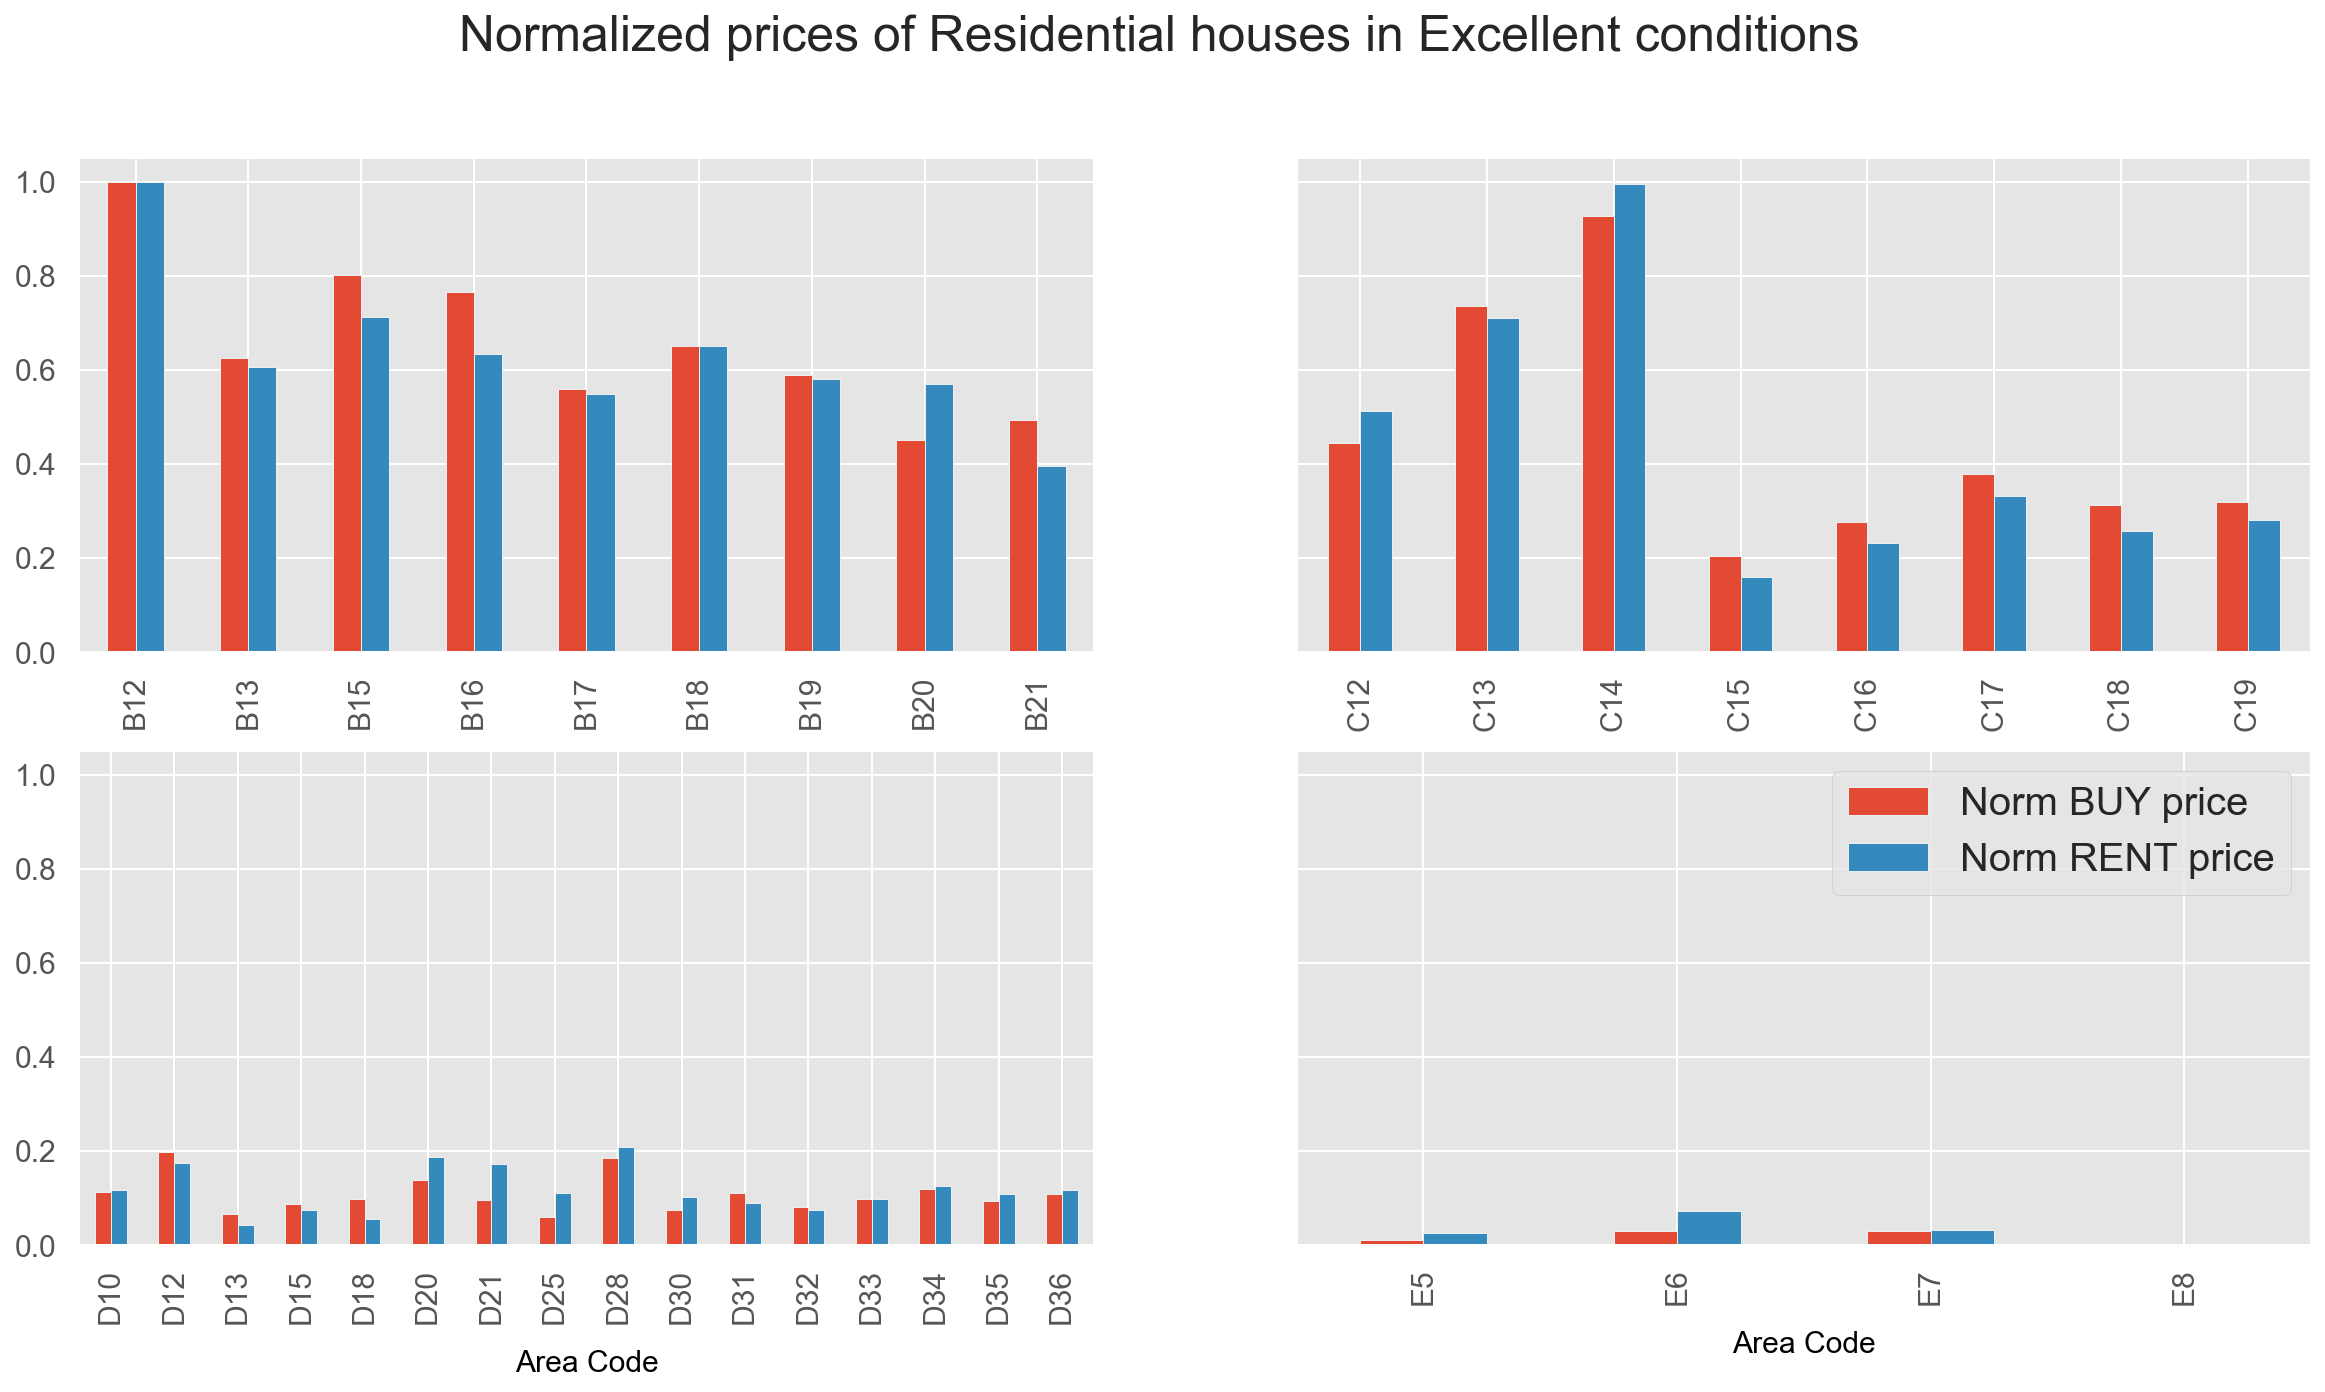

In [111]:
mpl.style.use('ggplot')
my_bar_plot(res_ex,'Residential houses','Excellent')

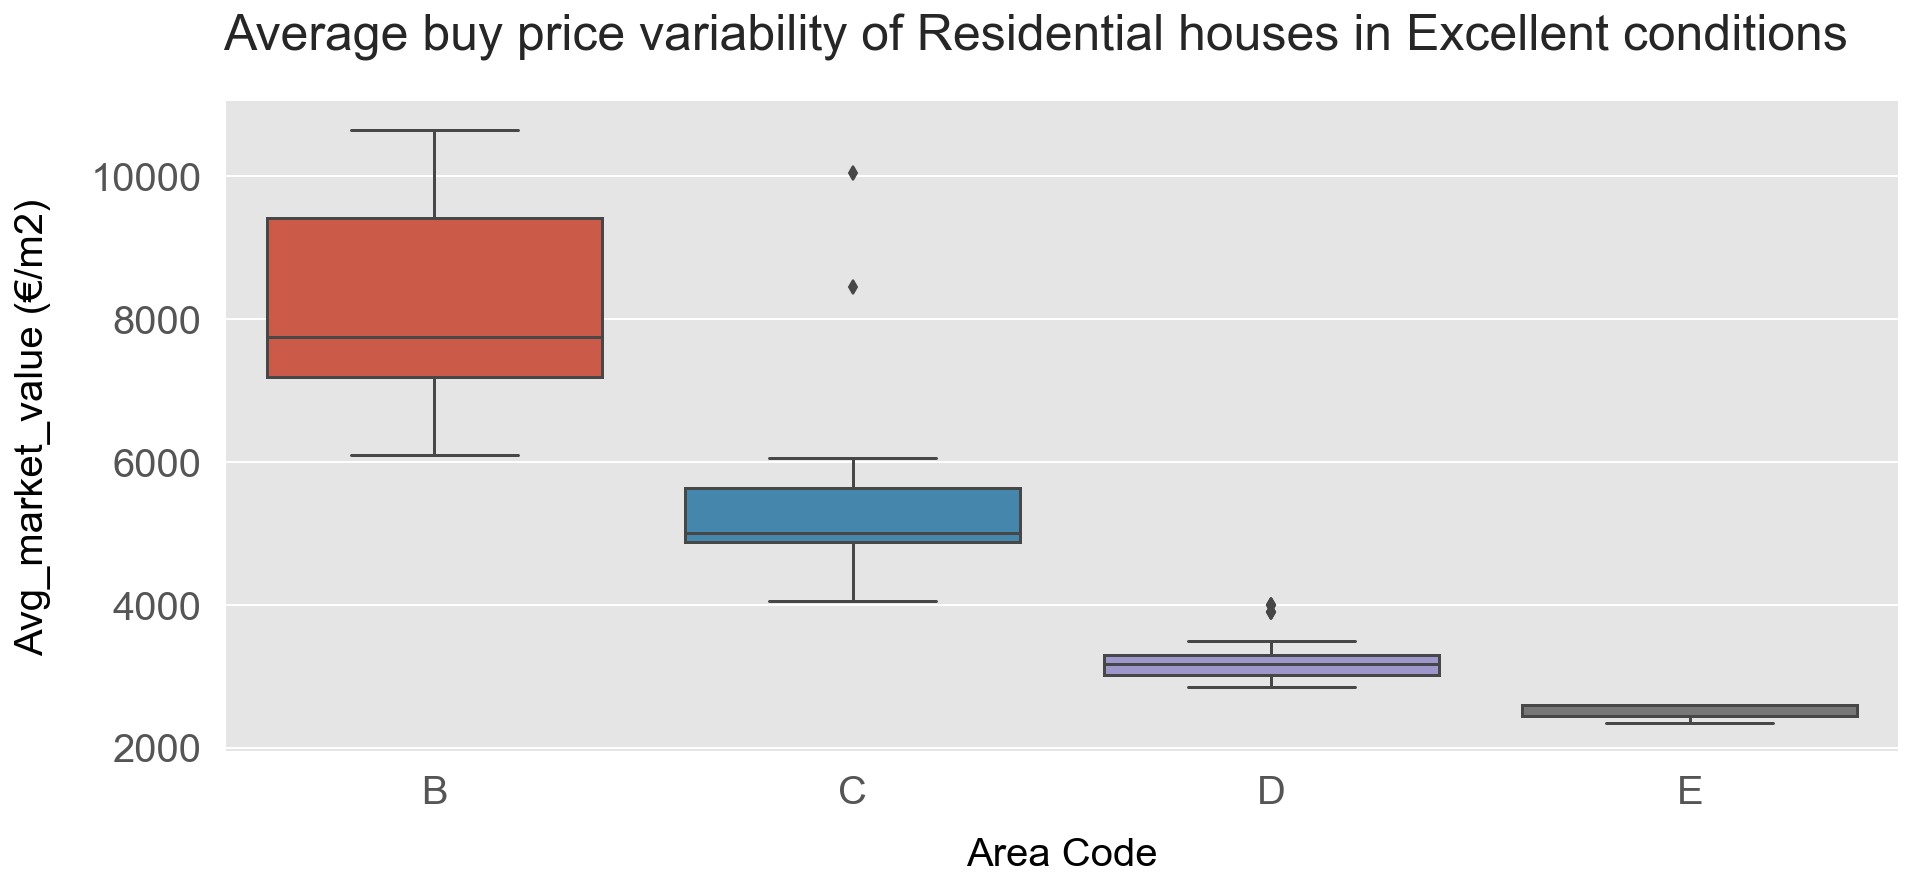

In [112]:
my_boxplots(res_ex,'Residential houses','Excellent','buy')

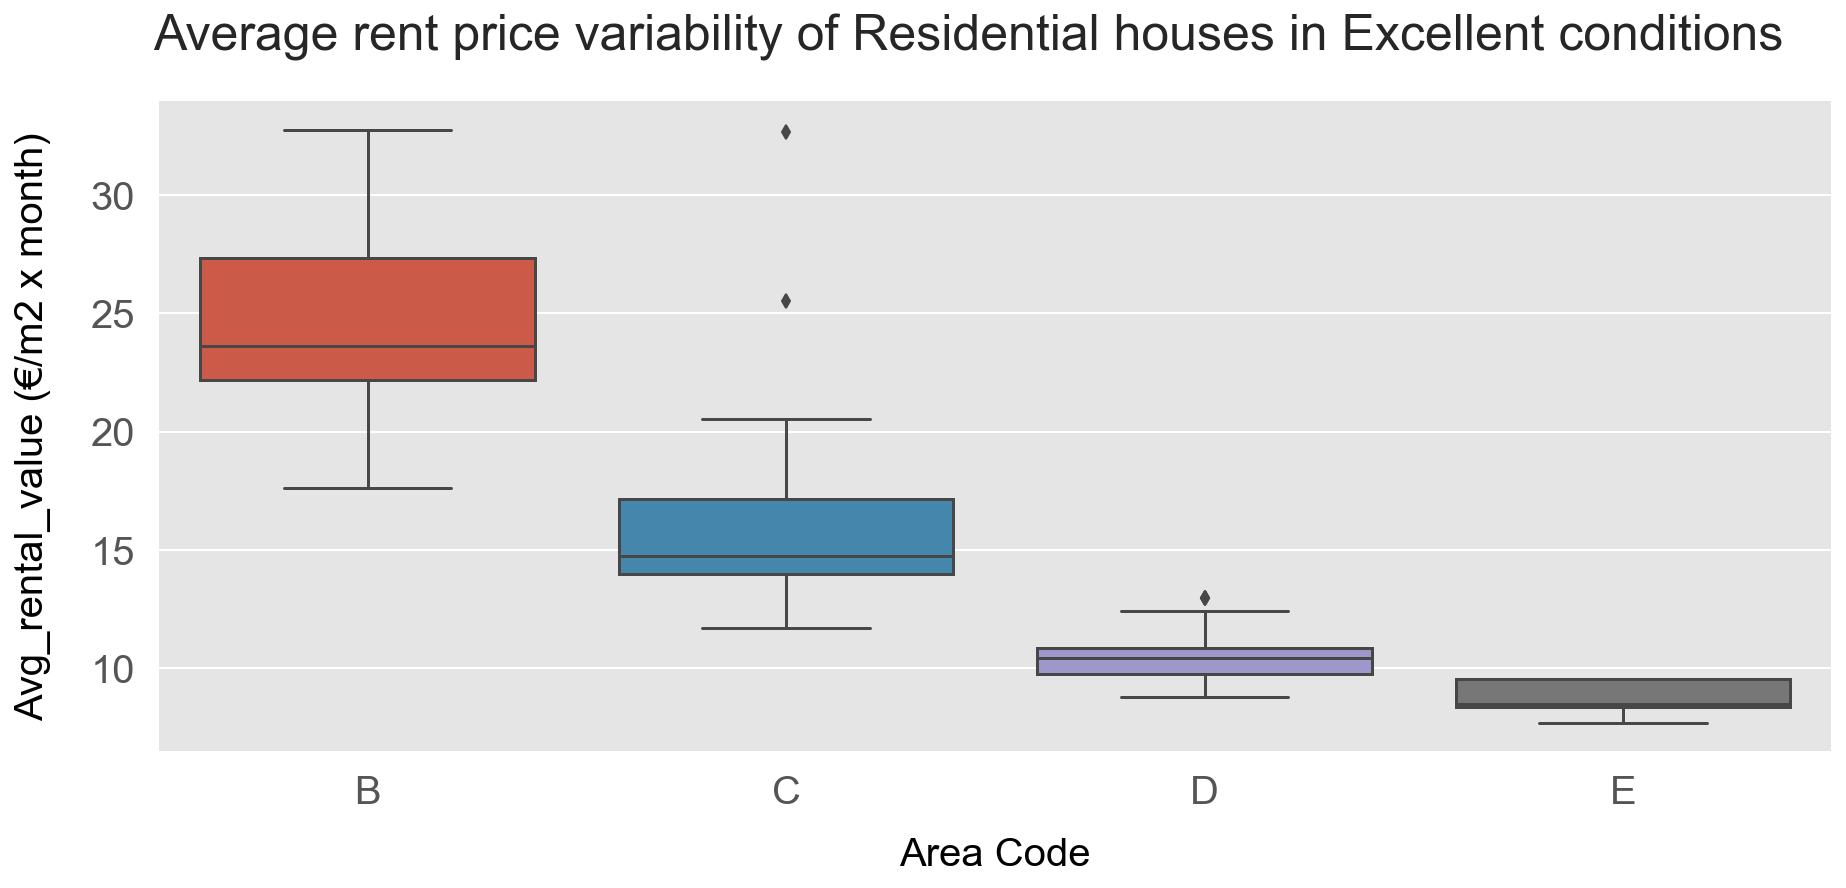

In [113]:
my_boxplots(res_ex,'Residential houses','Excellent','rent')

### Get only Normal residential houses 

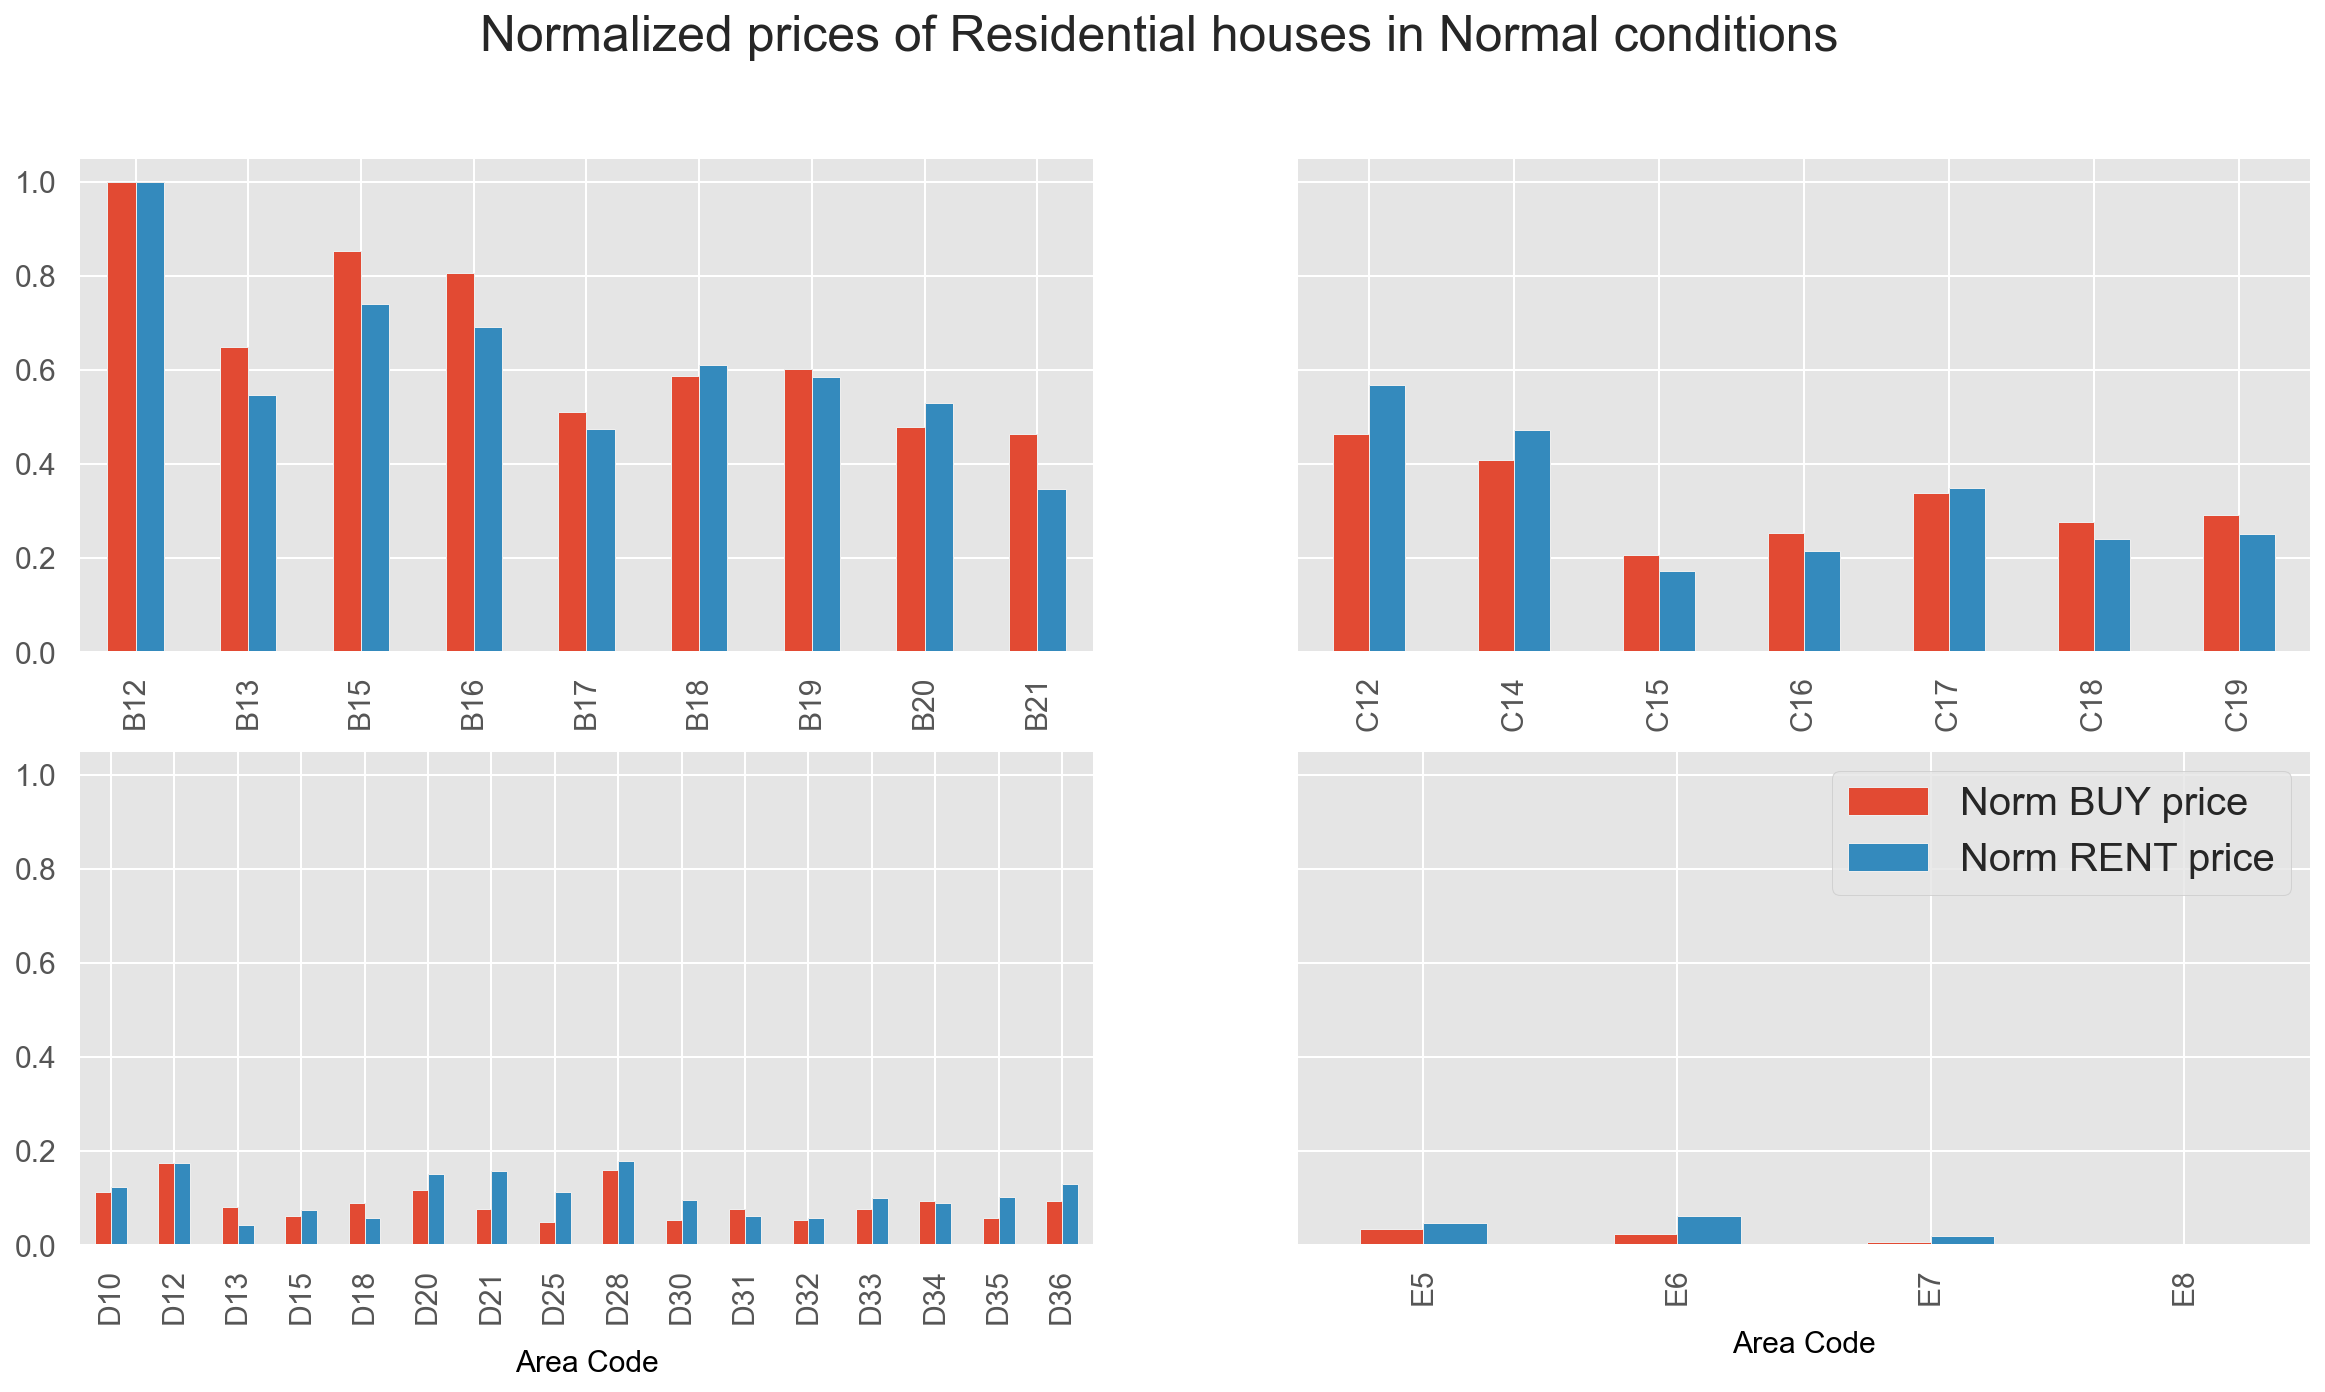

In [114]:
res_nor = get_subcategory(full_df,'Residential houses','Normal')
my_bar_plot(res_nor,'Residential houses','Normal')

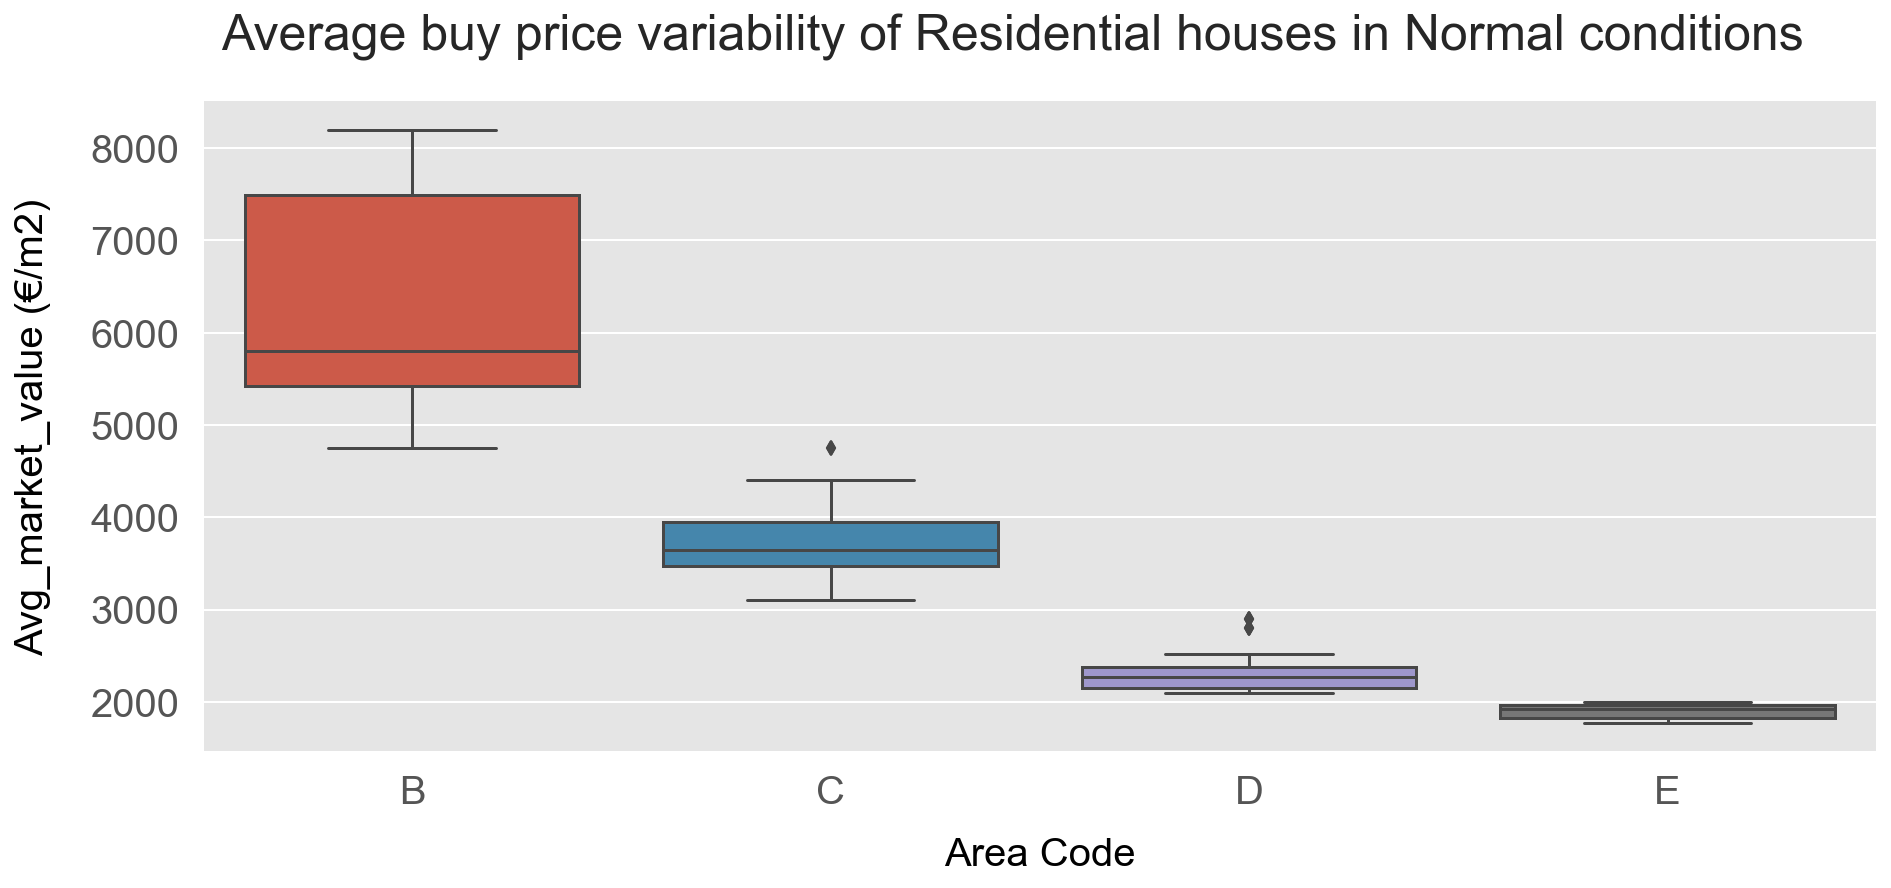

In [115]:
my_boxplots(res_nor,'Residential houses','Normal','buy')

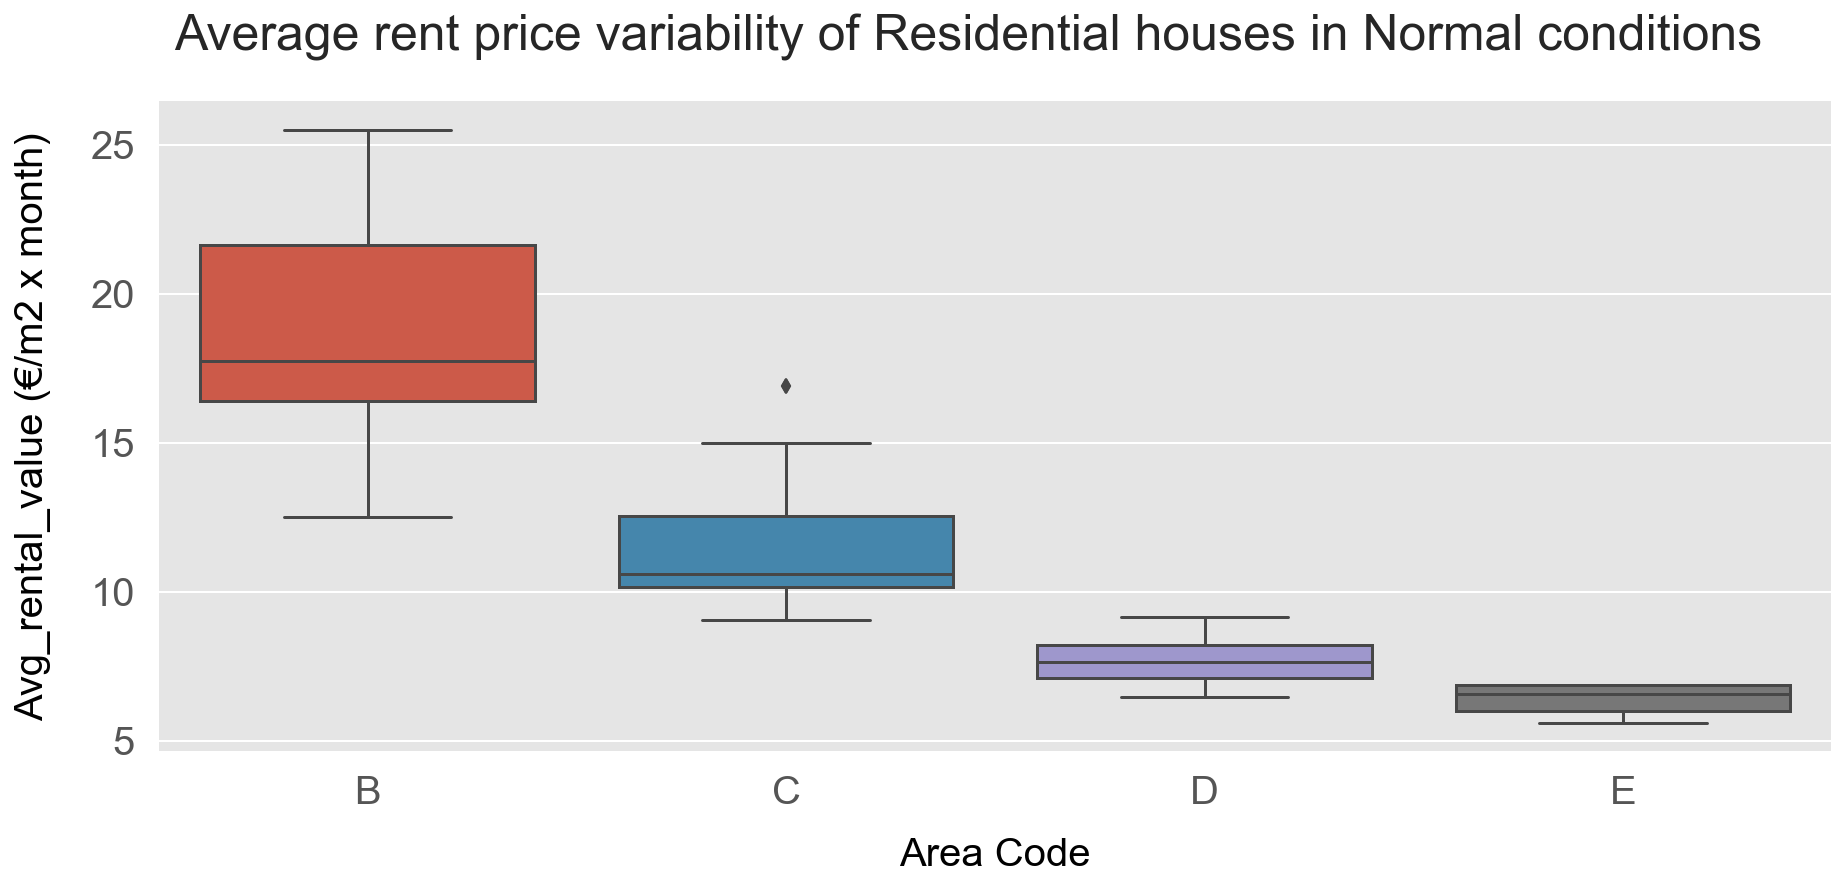

In [116]:
my_boxplots(res_nor,'Residential houses','Normal','rent')

### Get only Excellent stately houses 

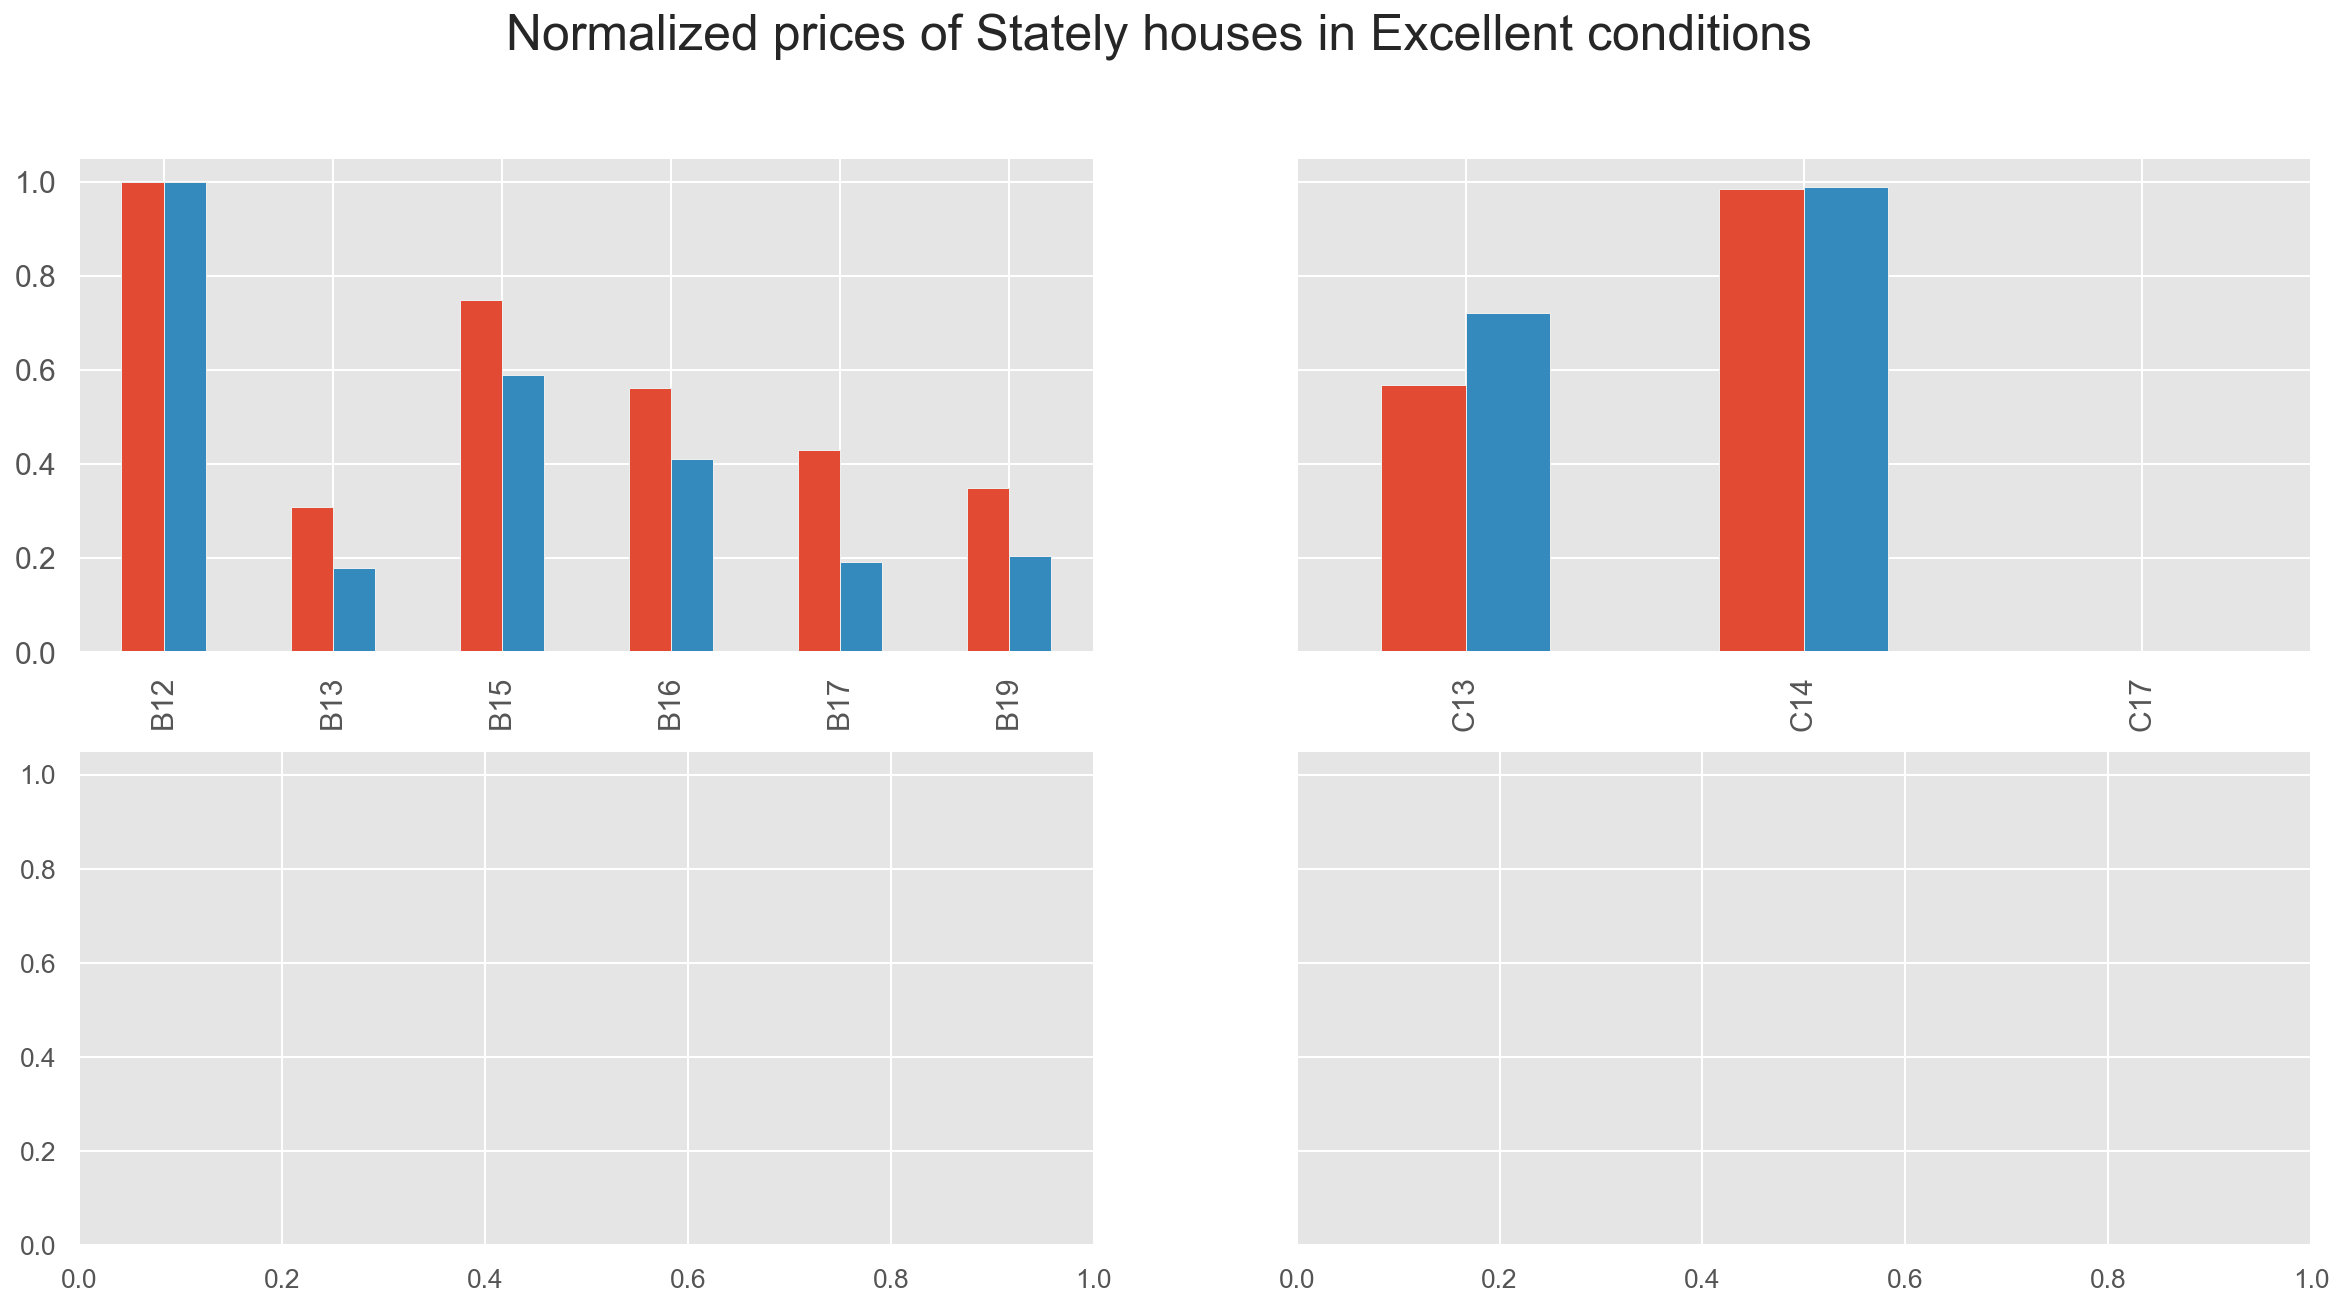

In [117]:
sta_ex = get_subcategory(full_df,'Stately houses','Excellent')
my_bar_plot(sta_ex,'Stately houses','Excellent')

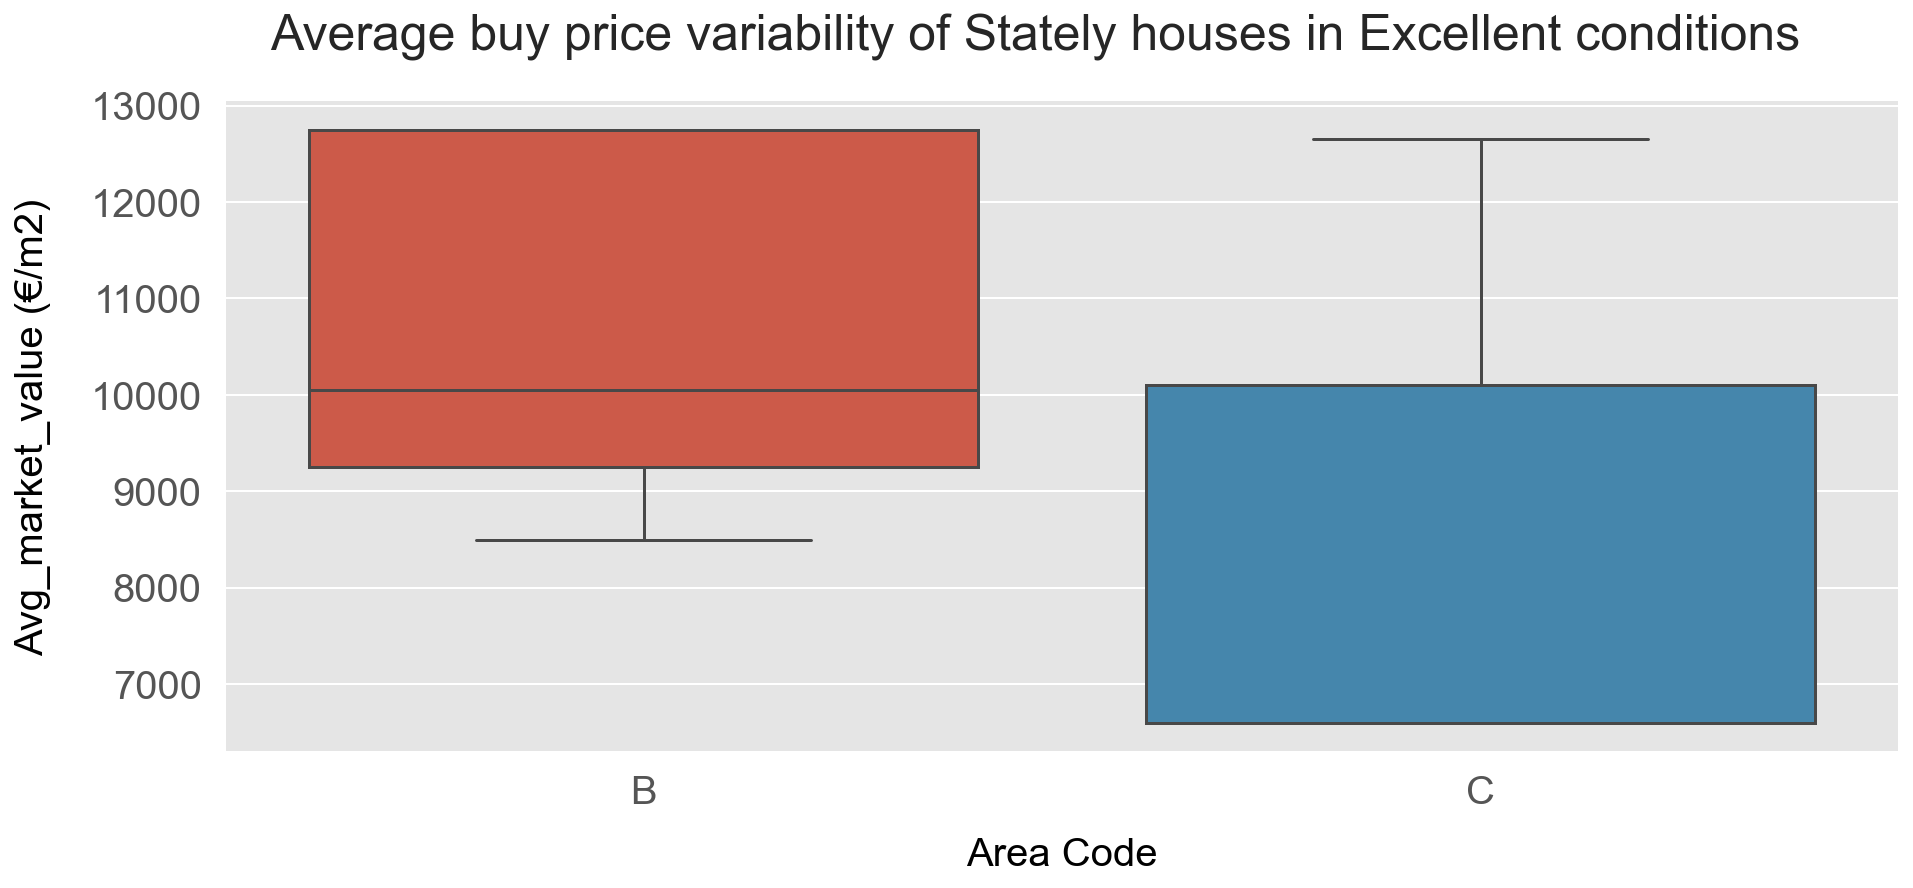

In [118]:
my_boxplots(sta_ex,'Stately houses','Excellent','buy')

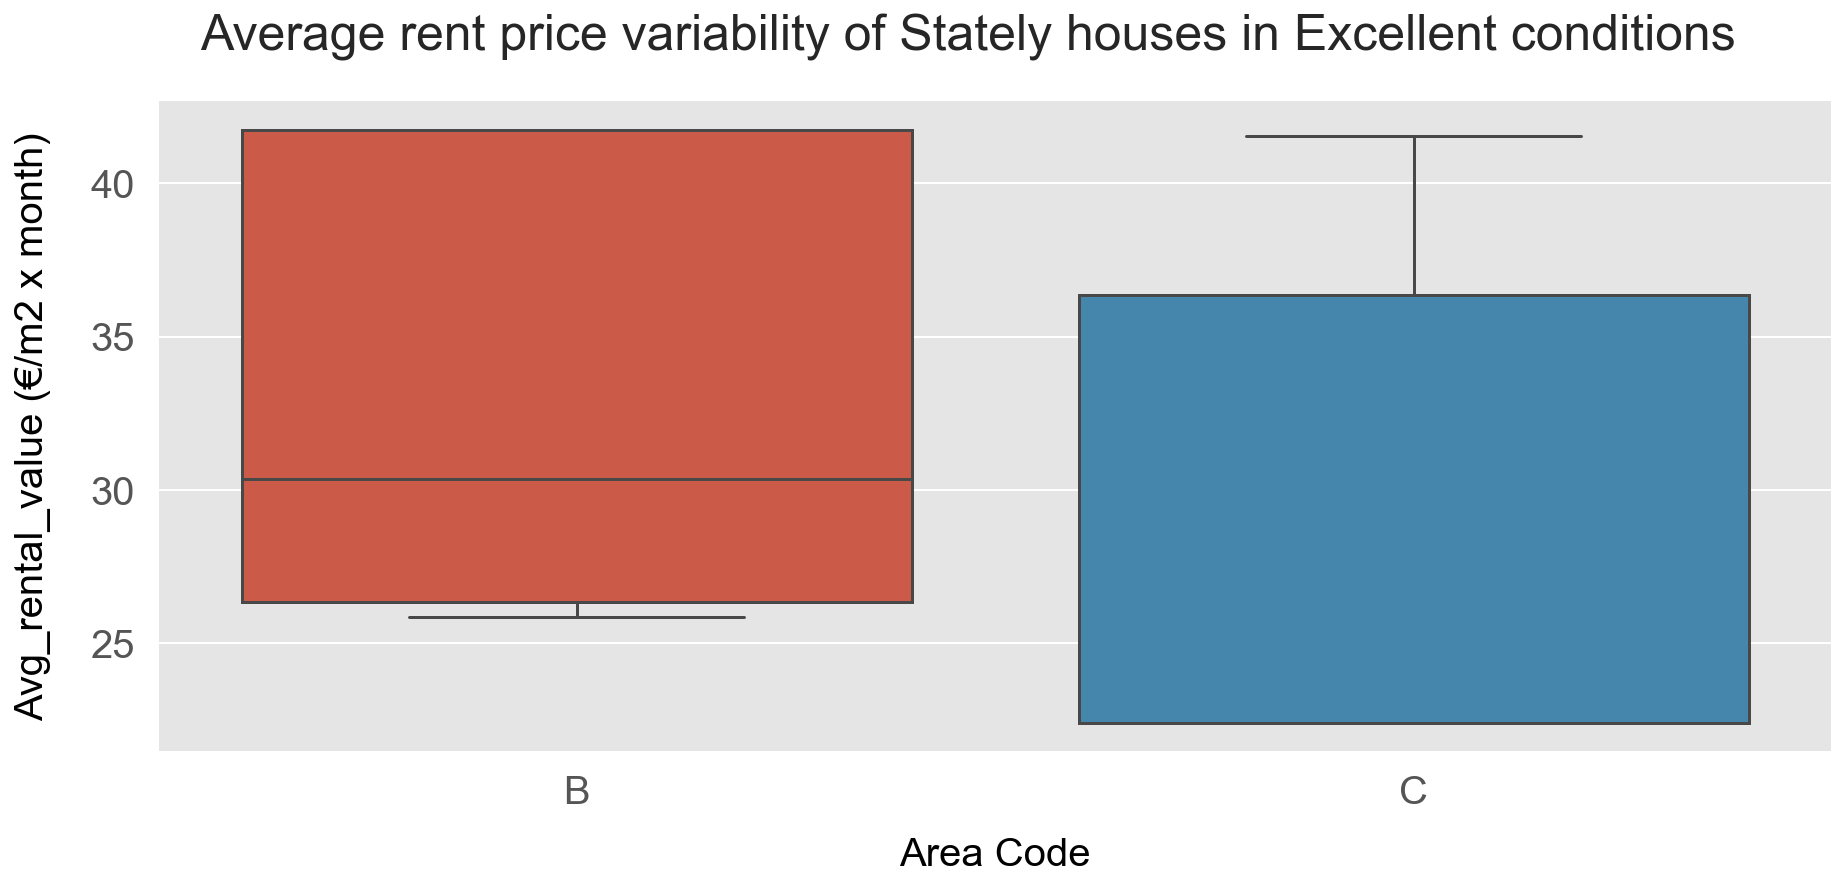

In [119]:
my_boxplots(sta_ex,'Stately houses','Excellent','rent')

### Get only Normal stately houses 

In [120]:
sta_nor = get_subcategory(full_df,'Stately houses','Normal')

No conditions met. Exiting.


### Observations

Bar plots shown that the boroughs closer to the city center are more expensive; on the contrary, the ones farthest to the city center are the most affordable. <br/>

Let's try to predict the housing price based only on the distance to the city center.

## 3.7 Price prediction based on distance: Regression <a name='3.7.'></a>

Box plots have shown that the most expensive residential houses are located in the B and C areas, and the most affordable ones are located in D and E areas, whereas not much of a difference emerged from stately houses which are also located only in B and C zones. <br/>

### Create the scatter plots

In [177]:
def my_scatter(ex_res,buy_or_rent,scale):
    if buy_or_rent == 'buy':
        ss = 'Avg_market_value (€/m2)'
    elif buy_or_rent == 'rent':
        ss = 'Avg_rental_value (€/m2 x month)'
    
    d = {'color': ['blue', 'green', 'purple', 'red']}
    
    sns.set(font_scale = 1.2)
    fg = sns.FacetGrid(data=ex_res, hue='Area', hue_kws=d, height=5.0, aspect=1.7)
    ttl = plt.title(f" ", weight='bold', size=13)
    
    plt.yscale(scale)
    plt.xscale(scale)
    fg.map(plt.scatter, 'Distance_from_center (km)', ss).add_legend()
    plt.xlabel('Distance to the city center (km)', fontsize=14)
    plt.ylabel('Price', fontsize=14) 




#### Scatter plot using the full Dataset

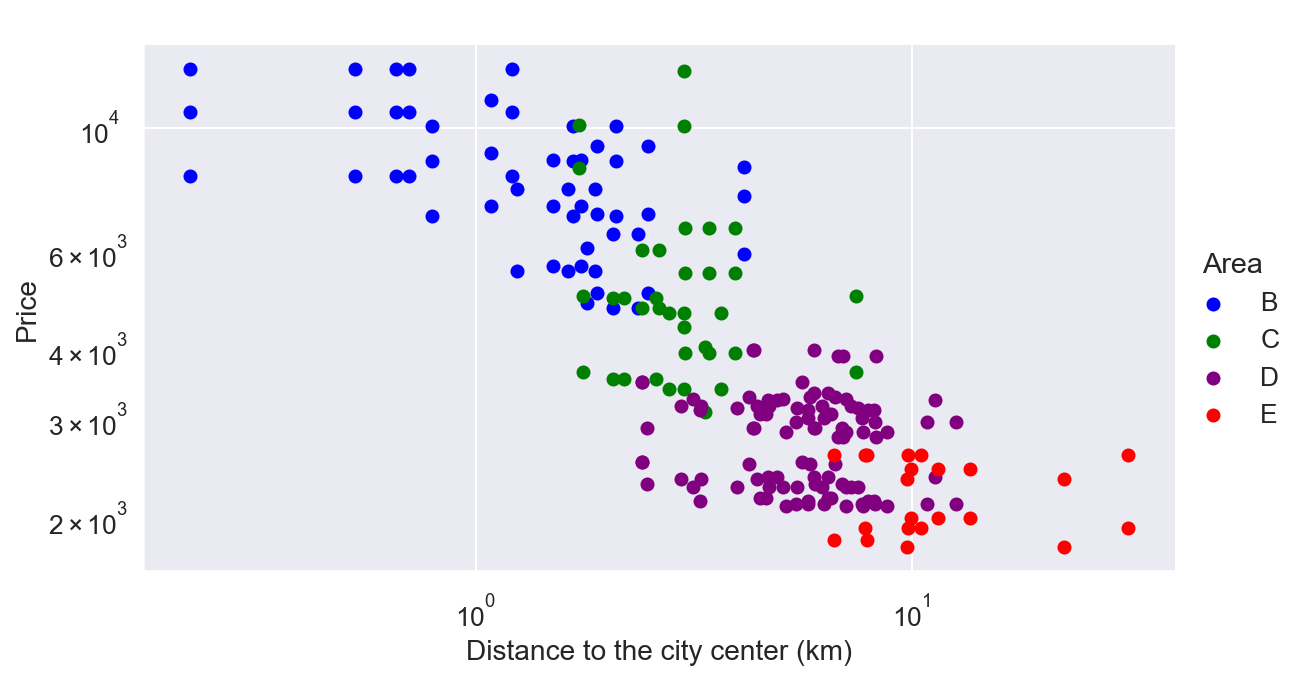

In [178]:
my_scatter(full_df,'buy','log')

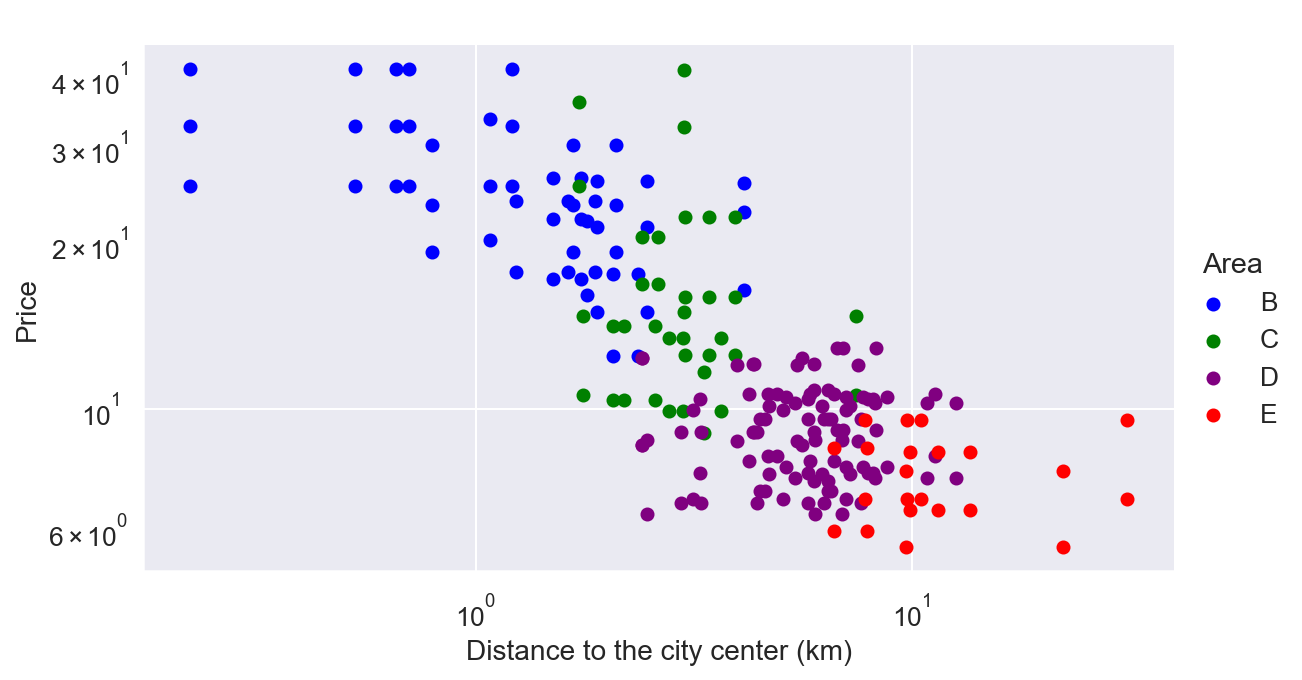

In [179]:
my_scatter(full_df,'rent','log')

As a linear correlation in log space is visible, lets fit a power law and an exponential model.

$y = a*x^b$ 

$y = c * exp^{-d*x} + e$

fit the model on the full_df without distinction of category

In [180]:
def model_func(x, a, b):
    return a * x**b 

def model_func2(x, c, d, e):
    return c * np.exp(-d*x) + e


def fit(df,buy_or_rent,scale):
    if buy_or_rent == 'buy':
        ss = 'Avg_market_value (€/m2)'
    elif buy_or_rent == 'rent':
        ss = 'Avg_rental_value (€/m2 x month)'
    
    x_er = df['Distance_from_center (km)']
    y_er = df[ss]

    p0 = (1.,-0.2) # starting point
    opt, pcov = curve_fit(model_func, x_er, y_er, p0)
    a, b = opt

    p0 = (1.,1.e-10,1.) # starting point
    opt, pcov = curve_fit(model_func2, x_er, y_er, p0)
    c, d, e = opt

    x2 = np.linspace(0.2, 40, 1000)
    y2 = model_func(x2, a, b)
    y3 = model_func2(x2, c, d, e)

    # plot
    fig, ax = plt.subplots(figsize=(10,5))

    plt.rcParams.update({'font.size': 20})
    ax.plot(x_er, y_er, 'bo', label='data')
    ax.plot(x2, y2, color='r', label=f'y = {a:.2f}*x^{b:.2f}')
    ax.plot(x2, y3, color='black', label=f'y = {c:.2f}*exp^{d:.2f}x + {e:.2f}')
    plt.yscale(scale)
    plt.xscale(scale)

    ax.legend()
    plt.title(f"{buy_or_rent.upper()} PRICE OF MILAN HOUSES VS DISTANCE", weight='bold', size=13)
    plt.xlabel('Distance to the city center (km)')
    plt.ylabel('Price')
    

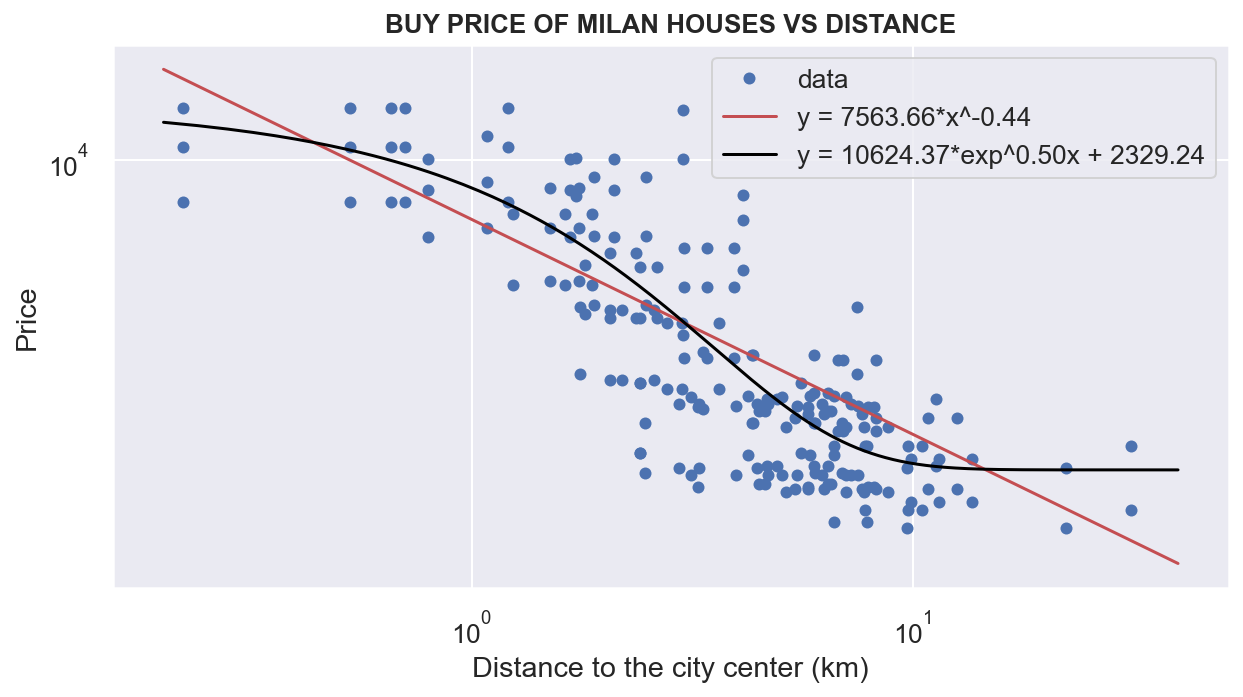

In [181]:
fit(full_df,'buy','log')

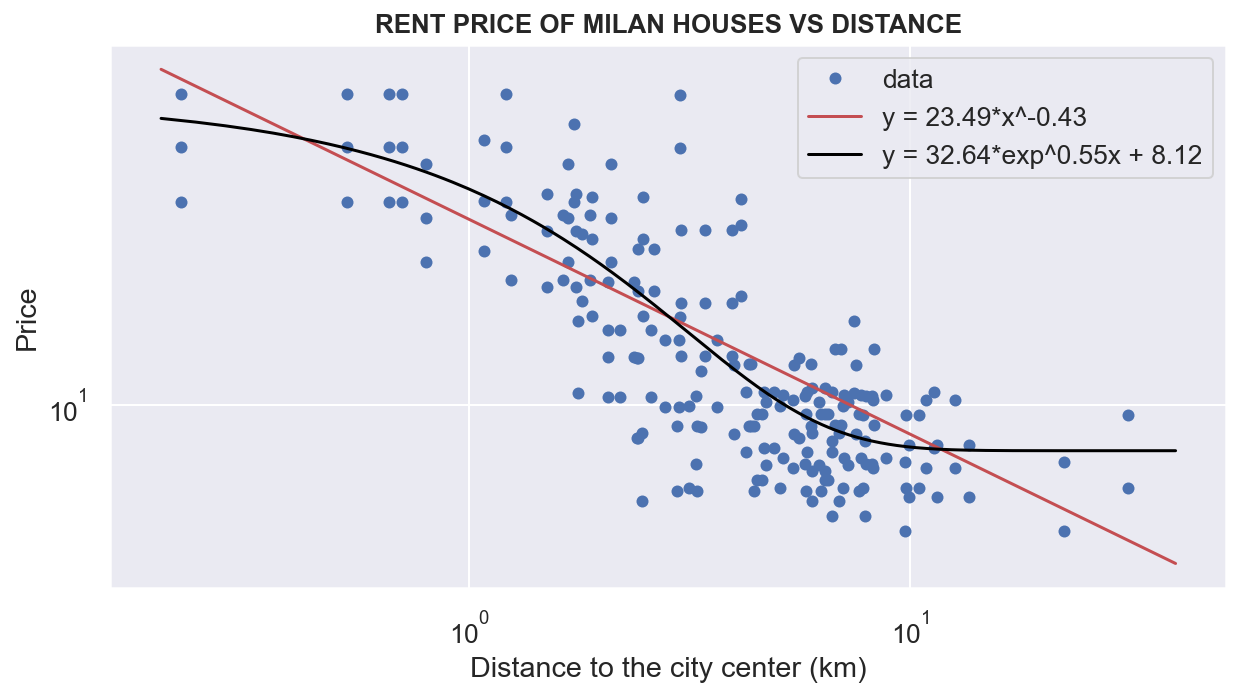

In [182]:
fit(full_df,'rent','log')

The same analysis can be performed on residential houses (normal and/or excellent conditions) and on stately houses. Let's see how normal residential houses will behave.

#### Buy a Residential house in Normal conditions 

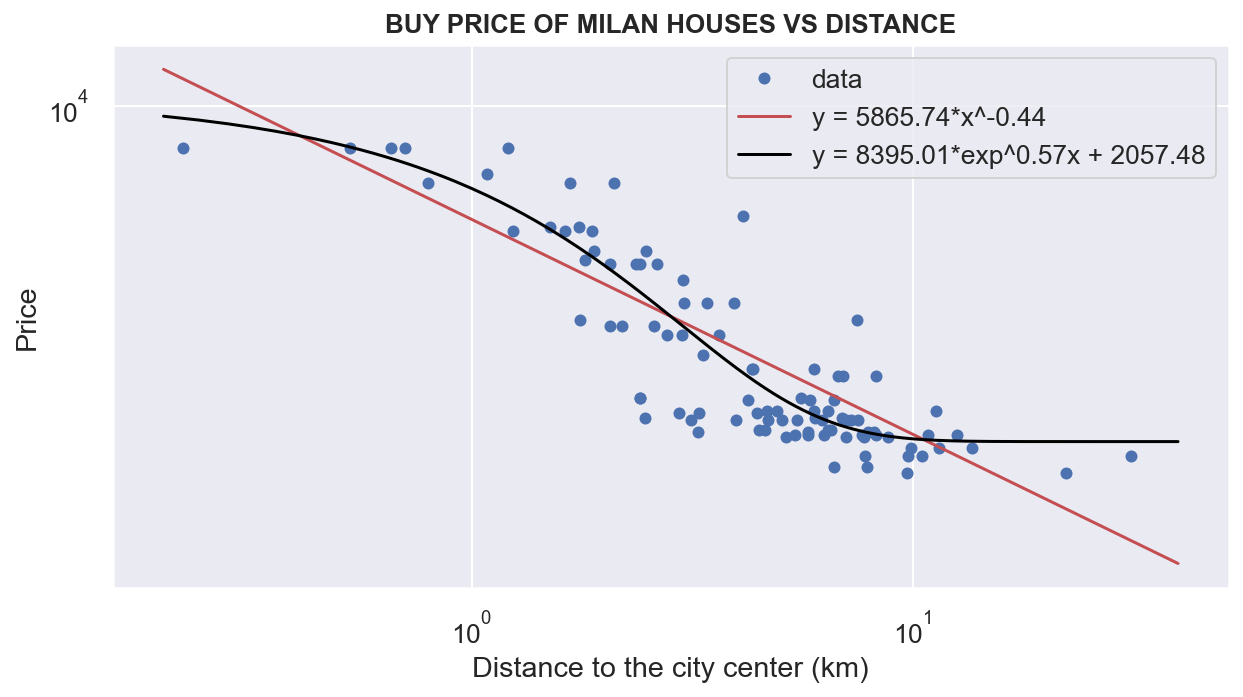

In [183]:
fit(res_nor,'buy','log')

#### Rent a Residential house in Normal conditions 

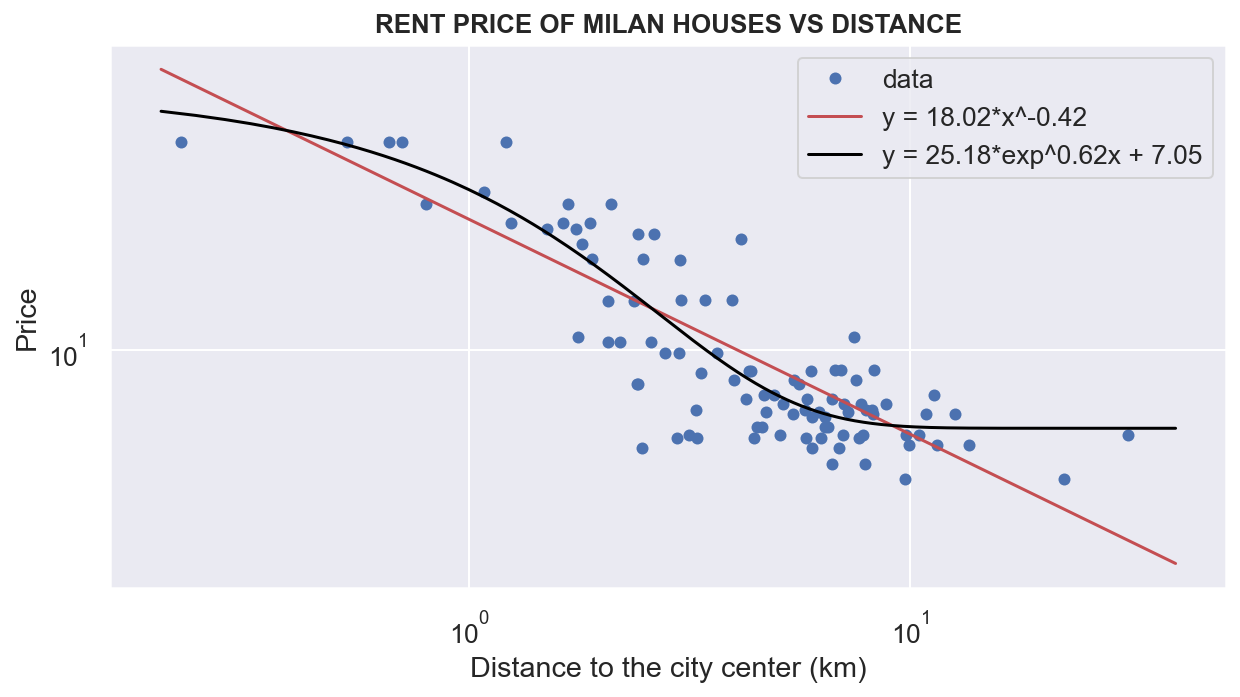

In [184]:
fit(res_nor,'rent','log')

#### Buy a Stately house in Milan

/Users/segatto/opt/anaconda3/envs/Data_Science_env/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


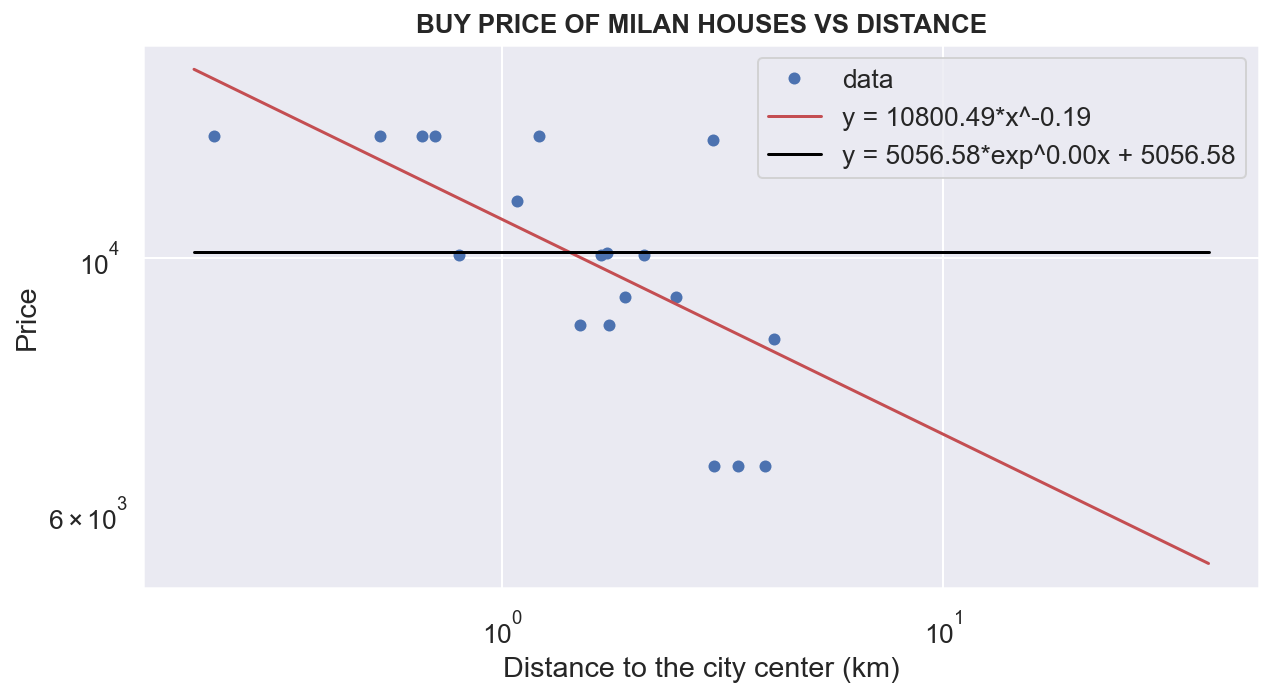

In [185]:
fit(sta_ex,'buy','log')

The exponential model is overfitted for this category. Use a power-law model. 

## 3.8 Venues analysis: Neighborhood segmentation and clustering <a name='3.8.'></a>

After determining the surrounding venues of the Milan neighborhoods, the latter have been divided in clusters, as to grouping them according to the more common venue types, in such a way that neighborhoods in the same group are more similar to each other than to those in other groups. To do that, K-means algorithm has been use. 

First of all we would add the borough code column to the dataframe of interest (neighborhoods_venues).

In [200]:
neighborhoods_venues = pd.merge(neighborhoods_venues, house_data1[['Neighborhoods', 'Borough code']], on='Neighborhoods')
neighborhoods_venues = neighborhoods_venues.drop_duplicates()
neighborhoods_venues.head()

,Neighborhoods,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Venue_Category,Borough code
0,DUOMO,45.464138,9.188555,Galleria Vittorio Emanuele II,45.465577,9.190024,Monument / Landmark,B12
3,DUOMO,45.464138,9.188555,Starbucks Reserve Roastery,45.464920,9.186153,Coffee Shop,B12
6,DUOMO,45.464138,9.188555,Piazza del Duomo,45.464190,9.189527,Plaza,B12
9,DUOMO,45.464138,9.188555,Room Mate Giulia Hotel,45.465250,9.189396,Hotel,B12
12,DUOMO,45.464138,9.188555,Terrazze del Duomo,45.464207,9.191075,Scenic Lookout,B12


Move borough code column next to neighborhoods columnm

In [201]:
Borough_code_columns = [neighborhoods_venues.columns[-1]] + list(neighborhoods_venues.columns[:-1])
neighborhoods_venues = neighborhoods_venues[Borough_code_columns]
neighborhoods_venues.head()

,Borough code,Neighborhoods,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Venue_Category
0,B12,DUOMO,45.464138,9.188555,Galleria Vittorio Emanuele II,45.465577,9.190024,Monument / Landmark
3,B12,DUOMO,45.464138,9.188555,Starbucks Reserve Roastery,45.464920,9.186153,Coffee Shop
6,B12,DUOMO,45.464138,9.188555,Piazza del Duomo,45.464190,9.189527,Plaza
9,B12,DUOMO,45.464138,9.188555,Room Mate Giulia Hotel,45.465250,9.189396,Hotel
12,B12,DUOMO,45.464138,9.188555,Terrazze del Duomo,45.464207,9.191075,Scenic Lookout


### Number of venues for each neighborhood

In [202]:
neighborhoods_venues.groupby('Neighborhoods').count().head()

,Borough code,Latitude,Longitude,Venue_Name,Venue_Latitude,Venue_Longitude,Venue_Category
Neighborhoods,,,,,,,
AFFORI,100,100,100,100,100,100,100
ARCO DELLA PACE,100,100,100,100,100,100,100
ARGONNE,100,100,100,100,100,100,100
ASCANIO SFORZA,100,100,100,100,100,100,100
BAUSAN,100,100,100,100,100,100,100


In [203]:
print('There are {} uniques categories.'.format(len(neighborhoods_venues['Venue_Category'].unique())))

There are 206 uniques categories.


In [204]:
neighborhoods_venues['Venue_Category'].unique()[:50]

array(['Monument / Landmark', 'Coffee Shop', 'Plaza', 'Hotel',
       'Scenic Lookout', 'Pizza Place', 'Ice Cream Shop', 'Art Gallery',
       'Opera House', 'Electronics Store', 'Boutique', 'Bistro',
       'Cocktail Bar', "Men's Store", 'Chocolate Shop', 'Café', 'Castle',
       'Hostel', 'Cupcake Shop', 'Park', 'Historic Site', 'Bookstore',
       'Museum', 'Fountain', 'Toy / Game Store', 'Theater',
       'Italian Restaurant', 'Sandwich Place', 'Department Store',
       'Sushi Restaurant', 'Restaurant', 'Salad Place', 'Church',
       'Art Museum', 'Bakery', 'Dessert Shop', 'Shoe Store', 'Gastropub',
       'Argentinian Restaurant', 'Trattoria/Osteria', 'Wine Bar',
       'Design Studio', 'Seafood Restaurant', 'Tram Station',
       'Snack Place', 'Vegetarian / Vegan Restaurant', 'Food Truck',
       'Japanese Restaurant', 'Roman Restaurant', 'Planetarium'],
      dtype=object)

### Analyze each neighborhoods

In [205]:
# one hot encoding
Milan_onehot = pd.get_dummies(neighborhoods_venues[['Venue_Category']], prefix="", prefix_sep="")

# add borough code and neighborhood column back to dataframe
Milan_onehot['Borough code'] = neighborhoods_venues['Borough code'] 
Milan_onehot['Neighborhoods'] = neighborhoods_venues['Neighborhoods'] 
Milan_onehot['Latitude'] = neighborhoods_venues['Latitude'] 
Milan_onehot['Longitude'] = neighborhoods_venues['Longitude'] 

# move borough code and neighborhood columsn to the first column
fixed_columns = list(Milan_onehot.columns[-4:]) + list(Milan_onehot.columns[:-4])
Milan_onehot = Milan_onehot[fixed_columns]

Milan_onehot.head()

,Borough code,Neighborhoods,Latitude,Longitude,Abruzzo Restaurant,Agriturismo,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Trattoria/Osteria,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Wine Bar,Wine Shop,Winery
0,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,B12,DUOMO,45.464138,9.188555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [206]:
Milan_grouped = Milan_onehot.groupby(["Borough code", "Neighborhoods", "Latitude", "Longitude"]).mean().reset_index()

print(Milan_grouped.shape)
Milan_grouped.head()

(101, 210)


,Borough code,Neighborhoods,Latitude,Longitude,Abruzzo Restaurant,Agriturismo,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Trattoria/Osteria,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Water Park,Wine Bar,Wine Shop,Winery
0,B12,CAIROLI,45.468701,9.181697,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.01,0.01
1,B12,MISSORI,45.459828,9.189555,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.02,0.00,0.00
2,B12,MONTENAPOLEONE,45.470015,9.192868,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.01,0.01
3,B12,SAN BABILA,45.466521,9.197529,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.03,0.00,0.00
4,B12,DUOMO,45.464138,9.188555,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.03,0.00,0.00


### Top 10 most common venues for each neighborhood

In [207]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Borough code', 'Neighborhoods', 'Latitude', 'Longitude']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough code'] = Milan_grouped['Borough code']
neighborhoods_venues_sorted['Neighborhoods'] = Milan_grouped['Neighborhoods']
neighborhoods_venues_sorted['Latitude'] = Milan_grouped['Latitude']
neighborhoods_venues_sorted['Longitude'] = Milan_grouped['Longitude']

for ind in np.arange(Milan_grouped.shape[0]):
    row_categories = Milan_grouped.iloc[ind, :].iloc[4:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 4:] = row_categories_sorted.index.values[0:num_top_venues]

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(101, 14)


,Borough code,Neighborhoods,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B12,CAIROLI,45.468701,9.181697,Hotel,Plaza,Park,Boutique,Cocktail Bar,Monument / Landmark,Ice Cream Shop,Italian Restaurant,Pizza Place,Seafood Restaurant
1,B12,MISSORI,45.459828,9.189555,Cocktail Bar,Plaza,Hotel,Boutique,Park,Seafood Restaurant,Ice Cream Shop,Café,Pizza Place,Monument / Landmark
2,B12,MONTENAPOLEONE,45.470015,9.192868,Plaza,Hotel,Cocktail Bar,Ice Cream Shop,Boutique,Pizza Place,Monument / Landmark,Park,Italian Restaurant,Café
3,B12,SAN BABILA,45.466521,9.197529,Hotel,Plaza,Cocktail Bar,Boutique,Pizza Place,Ice Cream Shop,Park,Monument / Landmark,Café,Wine Bar
4,B12,DUOMO,45.464138,9.188555,Plaza,Hotel,Park,Cocktail Bar,Boutique,Monument / Landmark,Pizza Place,Wine Bar,Seafood Restaurant,Café


### Clustering Neighborhoods

<b> Finding the optimal number of clusters </b>

In order to try to determine the optimal number of clusters (k), two different methods are going to be used – the elbow method and the silhouette score. Both of the analyses will be run on a range between 2 and 9 clusters.

Let's start with the elbow method:

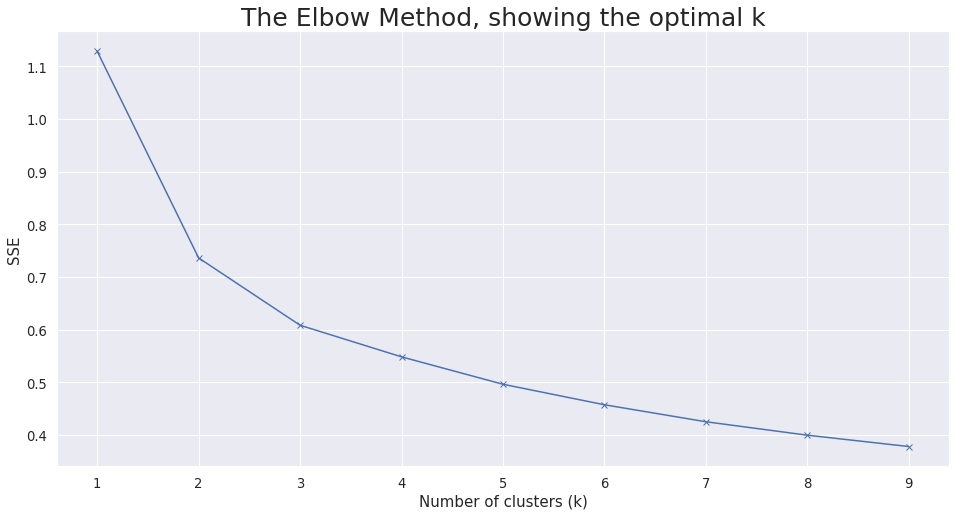

In [223]:
Milan_grouped_clustering = Milan_grouped.drop(["Borough code", "Neighborhoods", "Latitude", "Longitude"], 1)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(Milan_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(16,8))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of clusters (k)", fontsize= 15)
plt.ylabel("SSE", fontsize= 15)
plt.title('The Elbow Method, showing the optimal k', fontsize= 25)
plt.grid(True)
plt.show()

A bend in the curve at k = 2 it's an indication that 2 the best number of clusters.

Let's try the silhouette method:

In [209]:
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(Milan_grouped_clustering)
    centers = clusterer.cluster_centers_

    score = silhouette_score(Milan_grouped_clustering, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.32731147585194104)
For n_clusters = 3, silhouette score is 0.2639774305997771)
For n_clusters = 4, silhouette score is 0.23900029763094494)
For n_clusters = 5, silhouette score is 0.25548910956998644)
For n_clusters = 6, silhouette score is 0.2011800979734249)
For n_clusters = 7, silhouette score is 0.21381469618478638)
For n_clusters = 8, silhouette score is 0.19308687256242196)
For n_clusters = 9, silhouette score is 0.20002689805844748)


The silhouette method confirm that the optimal number of clusters for the dataset is k = 2, since it has the highest score.

In [210]:
# set number of clusters
kclusters = 2

Milan_grouped_clustering = Milan_grouped.drop(["Borough code", "Neighborhoods", "Latitude", "Longitude"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Milan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

### Add cluster_lable column to Milan_merged dataframe 

In [211]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.sort_values(by=['Cluster Labels'], inplace=True)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(101, 15)


,Cluster Labels,Borough code,Neighborhoods,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,B12,CAIROLI,45.468701,9.181697,Hotel,Plaza,Park,Boutique,Cocktail Bar,Monument / Landmark,Ice Cream Shop,Italian Restaurant,Pizza Place,Seafood Restaurant
33,0,C18,ASCANIO SFORZA,45.437966,9.174904,Cocktail Bar,Hotel,Art Gallery,Seafood Restaurant,Park,Plaza,Italian Restaurant,Café,Bakery,Pizza Place
34,0,C18,P.TA GENOVA,45.456665,9.174606,Plaza,Hotel,Cocktail Bar,Ice Cream Shop,Boutique,Art Gallery,Park,Café,Seafood Restaurant,Pizza Place
35,0,C18,SOLARI,45.459023,9.164888,Plaza,Hotel,Cocktail Bar,Seafood Restaurant,Ice Cream Shop,Park,Art Gallery,Café,Italian Restaurant,Monument / Landmark
36,0,C19,SARFATTI,45.448059,9.186987,Cocktail Bar,Hotel,Art Gallery,Seafood Restaurant,Plaza,Monument / Landmark,Boutique,Park,Café,Japanese Restaurant


### Visualize the resulting clusters

In [212]:
map_clusters = folium.Map(location=[lat, lon], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

def color(cluster): 
    if cluster == 0: 
        col_= 'green'
    else: 
        col_='orange'
    return col_

# add markers to the map
markers_colors = []
for lat, lon, b_code, neigh, cluster in zip(neighborhoods_venues_sorted['Latitude'], neighborhoods_venues_sorted['Longitude'], neighborhoods_venues_sorted['Borough code'], neighborhoods_venues_sorted['Neighborhoods'], neighborhoods_venues_sorted['Cluster Labels']):
    label = folium.Popup('{} (Borough code: {}) - Cluster {}'.format(neigh, b_code, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color= color(cluster),
        parse_html=False, legend_name='SCALE',
        fill=True,
        fill_opacity=0.8).add_to(map_clusters)

legend_html = '''
    <div style="position: fixed;  
        bottom: 10px; left: 10px; width: 100px; height: 70px; 
        border:2px solid grey; z-index:9999; font-size:11px;">&nbsp; Legend <br>
        &nbsp; <b> Cluster 1 </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
        &nbsp; <b> Cluster 2 </b> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i><br>
    </div>
    '''
map_clusters.get_root().html.add_child(folium.Element(legend_html))
       
map_clusters

### Examine Clusters

<u><b> cluster 1: </b></u>

In [213]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 0, neighborhoods_venues_sorted.columns[[1] + list(range(5, neighborhoods_venues_sorted.shape[1]))]]

,Borough code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B12,Hotel,Plaza,Park,Boutique,Cocktail Bar,Monument / Landmark,Ice Cream Shop,Italian Restaurant,Pizza Place,Seafood Restaurant
33,C18,Cocktail Bar,Hotel,Art Gallery,Seafood Restaurant,Park,Plaza,Italian Restaurant,Café,Bakery,Pizza Place
34,C18,Plaza,Hotel,Cocktail Bar,Ice Cream Shop,Boutique,Art Gallery,Park,Café,Seafood Restaurant,Pizza Place
35,C18,Plaza,Hotel,Cocktail Bar,Seafood Restaurant,Ice Cream Shop,Park,Art Gallery,Café,Italian Restaurant,Monument / Landmark
36,C19,Cocktail Bar,Hotel,Art Gallery,Seafood Restaurant,Plaza,Monument / Landmark,Boutique,Park,Café,Japanese Restaurant
37,C19,Ice Cream Shop,Hotel,Cocktail Bar,Plaza,Café,Monument / Landmark,Boutique,Italian Restaurant,Coffee Shop,Art Gallery
39,D10,Ice Cream Shop,Hotel,Cocktail Bar,Boutique,Italian Restaurant,Art Gallery,Pizza Place,Café,Pub,Plaza
41,D12,Cocktail Bar,Hotel,Plaza,Pizza Place,Ice Cream Shop,Boutique,Monument / Landmark,Art Gallery,Dessert Shop,Park
42,D12,Hotel,Cocktail Bar,Ice Cream Shop,Boutique,Pizza Place,Plaza,Monument / Landmark,Bakery,Art Gallery,Japanese Restaurant
43,D12,Ice Cream Shop,Plaza,Hotel,Cocktail Bar,Italian Restaurant,Boutique,Pizza Place,Park,Art Gallery,Monument / Landmark


<u><b> Cluster 2: </b></u>

In [214]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Cluster Labels'] == 1, neighborhoods_venues_sorted.columns[[1] + list(range(5, neighborhoods_venues_sorted.shape[1]))]]

,Borough code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,D35,Italian Restaurant,Pizza Place,Ice Cream Shop,Dessert Shop,Hotel,Café,Japanese Restaurant,Gym / Fitness Center,Sushi Restaurant,Cocktail Bar
84,D35,Italian Restaurant,Ice Cream Shop,Cocktail Bar,Café,Hotel,Boutique,Dessert Shop,Art Gallery,Pizza Place,Park
82,D34,Ice Cream Shop,Italian Restaurant,Hotel,Park,Pizza Place,Cocktail Bar,Café,Sushi Restaurant,Coffee Shop,Boutique
81,D34,Italian Restaurant,Pizza Place,Ice Cream Shop,Café,Hotel,Cocktail Bar,Art Gallery,Dessert Shop,Brewery,Pub
85,D35,Italian Restaurant,Pizza Place,Dessert Shop,Hotel,Café,Ice Cream Shop,Japanese Restaurant,Gym / Fitness Center,Sandwich Place,Gym
94,E6,Ice Cream Shop,Italian Restaurant,Park,Café,Pub,Seafood Restaurant,Sushi Restaurant,Hotel,Pizza Place,Supermarket
98,E7,Italian Restaurant,Restaurant,Supermarket,Hotel,Pizza Place,Tram Station,Clothing Store,Electronics Store,Theater,Chinese Restaurant
90,E5,Italian Restaurant,Pizza Place,Restaurant,Park,Café,Supermarket,Japanese Restaurant,Bakery,Shoe Store,Brewery
91,E5,Supermarket,Italian Restaurant,Pizza Place,Restaurant,Furniture / Home Store,Pool,Bakery,Park,Steakhouse,Japanese Restaurant
92,E5,Italian Restaurant,Park,Pizza Place,Café,Ice Cream Shop,Japanese Restaurant,Restaurant,Gym / Fitness Center,Sporting Goods Shop,Bakery


### Representing the top 10 venues for each cluster and calculate the %

First of all we have to associate the borough code and the related venue categories with the cluster label.

In [215]:
neighborhoods_clusters_venues = pd.merge(neighborhoods_venues, neighborhoods_venues_sorted[['Cluster Labels', 'Neighborhoods']], on='Neighborhoods')
neighborhoods_clusters_venues = neighborhoods_clusters_venues.drop(['Latitude', 'Longitude', 'Venue_Name', 'Venue_Latitude', 'Venue_Longitude'], axis=1)
neighborhoods_clusters_venues.head()

,Borough code,Neighborhoods,Venue_Category,Cluster Labels
0,B12,DUOMO,Monument / Landmark,0
1,B12,DUOMO,Coffee Shop,0
2,B12,DUOMO,Plaza,0
3,B12,DUOMO,Hotel,0
4,B12,DUOMO,Scenic Lookout,0


Now, we find how many times each venue category occurs.

In [216]:
neighborhoods_clusters = neighborhoods_clusters_venues.groupby(by=['Cluster Labels', 'Venue_Category'])['Venue_Category'].count()
neighborhoods_clusters = neighborhoods_clusters.to_frame(name='Frequency').reset_index()
neighborhoods_clusters.sort_values(['Cluster Labels', 'Frequency'], ascending=[True, False]).head()

,Cluster Labels,Venue_Category,Frequency
60,0,Hotel,454
27,0,Cocktail Bar,435
84,0,Plaza,404
61,0,Ice Cream Shop,325
12,0,Boutique,278


and then we calculate the % for each venue category of both clusters.

In [217]:
neighborhoods_clusters_0 = neighborhoods_clusters[neighborhoods_clusters['Cluster Labels']==0]
neighborhoods_clusters_0 ['%'] = round(neighborhoods_clusters_0['Frequency']/neighborhoods_clusters_0['Frequency'].sum()*100,1)
neighborhoods_clusters_0 = neighborhoods_clusters_0.sort_values('%', ascending=False)
neighborhoods_clusters_0 = neighborhoods_clusters_0.reset_index(drop=True).head(10)
neighborhoods_clusters_0 = neighborhoods_clusters_0.drop(['Cluster Labels', 'Frequency'], 1)
neighborhoods_clusters_0

,Venue_Category,%
0,Hotel,7.1
1,Cocktail Bar,6.8
2,Plaza,6.3
3,Ice Cream Shop,5.1
4,Boutique,4.3
5,Park,4.0
6,Monument / Landmark,3.4
7,Italian Restaurant,3.3
8,Pizza Place,3.3
9,Café,3.2


In [218]:
neighborhoods_clusters_1 = neighborhoods_clusters[neighborhoods_clusters['Cluster Labels']==1]
neighborhoods_clusters_1 ['%'] = round(neighborhoods_clusters_1['Frequency']/neighborhoods_clusters_1['Frequency'].sum()*100,1)
neighborhoods_clusters_1 = neighborhoods_clusters_1.sort_values('%', ascending=False)
neighborhoods_clusters_1 = neighborhoods_clusters_1.reset_index(drop=True).head(10)
neighborhoods_clusters_1.drop(['Cluster Labels', 'Frequency'], 1)

,Venue_Category,%
0,Italian Restaurant,10.7
1,Pizza Place,5.6
2,Ice Cream Shop,5.3
3,Park,4.8
4,Café,4.5
5,Hotel,4.3
6,Supermarket,2.6
7,Dessert Shop,2.6
8,Japanese Restaurant,2.4
9,Cocktail Bar,2.3


now we can create the barh plots.

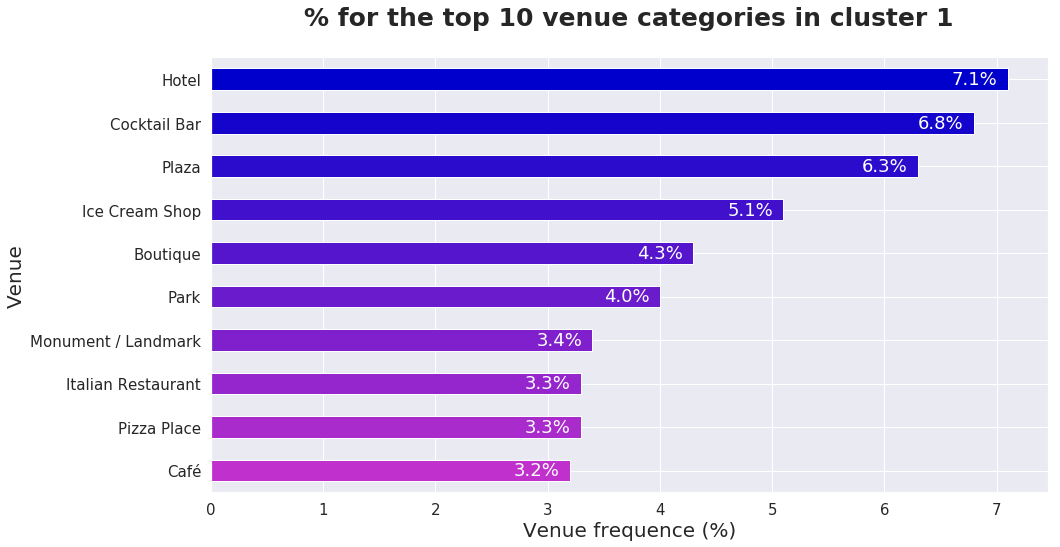

In [219]:
customcmap = [(x/12.0,  x/48.0, 0.8) for x in range(len(neighborhoods_clusters_0))]

ax = neighborhoods_clusters_0.plot(kind='barh', x='Venue_Category', y='%', color=customcmap, figsize=(15, 8), fontsize=15, legend=False) 
plt.xlabel('Venue frequence (%)', fontsize=20)
plt.ylabel('Venue', fontsize=20)
ttl = plt.title('% for the top 10 venue categories in cluster 1', fontsize=25, weight='bold')
ttl.set_position([.5, 1.06])
ax.invert_yaxis()

ctb = LinearSegmentedColormap.from_list('custombar', customcmap, N=2048)
sm = plt.cm.ScalarMappable(cmap=ctb)

for i, (p, pr) in enumerate(zip( neighborhoods_clusters_0['Venue_Category'], neighborhoods_clusters_0["%"])):
    plt.text(s=str(pr)+"%", x=pr-0.5, y=i, color="w",verticalalignment="center", horizontalalignment="left", size=18)

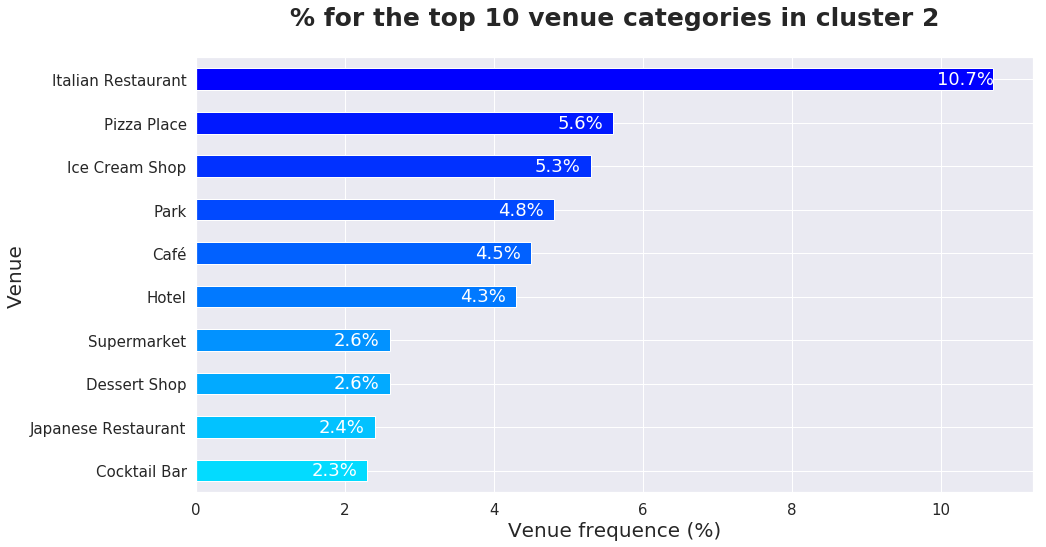

In [220]:
customcmap = [(x/900.5,  x/10.5, 1) for x in range(len(neighborhoods_clusters_1))]

ax = neighborhoods_clusters_1.plot(kind='barh', x='Venue_Category', y='%', color=customcmap, figsize=(15, 8), fontsize=15, legend=False) 
plt.xlabel('Venue frequence (%)', fontsize=20)
plt.ylabel('Venue', fontsize=20)
ttl = plt.title('% for the top 10 venue categories in cluster 2', fontsize=25, weight='bold')
ttl.set_position([.5, 1.06])
ax.invert_yaxis()

ctb = LinearSegmentedColormap.from_list('custombar', customcmap, N=2048)
sm = plt.cm.ScalarMappable(cmap=ctb)

for i, (p, pr) in enumerate(zip( neighborhoods_clusters_1['Venue_Category'], neighborhoods_clusters_1["%"])):
    plt.text(s=str(pr)+"%", x=pr-0.75, y=i, color="w",verticalalignment="center", horizontalalignment="left", size=18)